In [1]:
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio


import plotly.offline as pyo
import plotly.graph_objs as go


import warnings
warnings.filterwarnings(action='ignore')
#from tabulate import tabulate


In [2]:
import sys
print(sys.executable)

C:\Users\Misi\anaconda3\envs\YOLOv8\python.exe


In [81]:
#используется для загрузки данных из файла CSV с именем "stroke.csv" в переменную data с помощью библиотеки Pandas в Python.
#Когда вы вызываете data, вы просто просматриваете содержимое этой переменной, которая теперь содержит данные из файла CSV. Если вы хотите вывести содержимое данных в Jupyter Notebook или в консоли Python, 
#достаточно вызвать переменную data после загрузки данных из CSV файла.

data = pd.read_csv('stroke.csv')
data

id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  18.0              NaN   
1           Private          Urban              87.96  39.2     never smoked   
2           Private          Urban             110.89  17.6              NaN   
3           Private          Rural              69.04  35.9  formerly smoked   
4      Never_worked          Rural             161.28  19.1              NaN   
...             ...            ...                ...   ...              ...   
43395      children          Urban              58.64  20.4     never smoked   
43396      Govt_job          Urban             213.61  55.4  formerly smoked   
43397       Private          Urban              91.94  28.9  formerly smoked   
43398       Private          Urban              99.16  33.2     never smoked   
43399       Private          Urban              79.48  20.6     never smoked   

       stroke  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0  

[43400 rows x 12 columns]

In [82]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

#### Data info

In [83]:
from tabulate import tabulate

In [84]:
## Создание заголовков для таблицы с информацией о столбцах
headers = ["Column Name", "Data Type", "Non-Null Count"]
## Получение информации о каждом столбце и его типе данных
data_1 = [[col, data[col].dtype, data[col].count()] for col in data.columns]
## Создание таблицы с помощью tabulate
table = tabulate(data_1, headers=headers, tablefmt="pretty")
print(table)

+-------------------+-----------+----------------+
|    Column Name    | Data Type | Non-Null Count |
+-------------------+-----------+----------------+
|        id         |   int64   |     43400      |
|      gender       |  object   |     43400      |
|        age        |  float64  |     43400      |
|   hypertension    |   int64   |     43400      |
|   heart_disease   |   int64   |     43400      |
|   ever_married    |  object   |     43400      |
|     work_type     |  object   |     43400      |
|  Residence_type   |  object   |     43400      |
| avg_glucose_level |  float64  |     43400      |
|        bmi        |  float64  |     41938      |
|  smoking_status   |  object   |     30108      |
|      stroke       |   int64   |     43400      |
+-------------------+-----------+----------------+


In [85]:
# Функция duplicated() ищет повторяющиеся строки в DataFrame и возвращает булеву серию,
# где True обозначает строки, которые являются дубликатами
duplicateRows = data[data.duplicated()]
duplicateRows = data[data.duplicated()]

# Вывод строк-дубликатов, если они есть
print(duplicateRows)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


#### Visualization of NaN values, визуализация NaN данных

<Axes: >

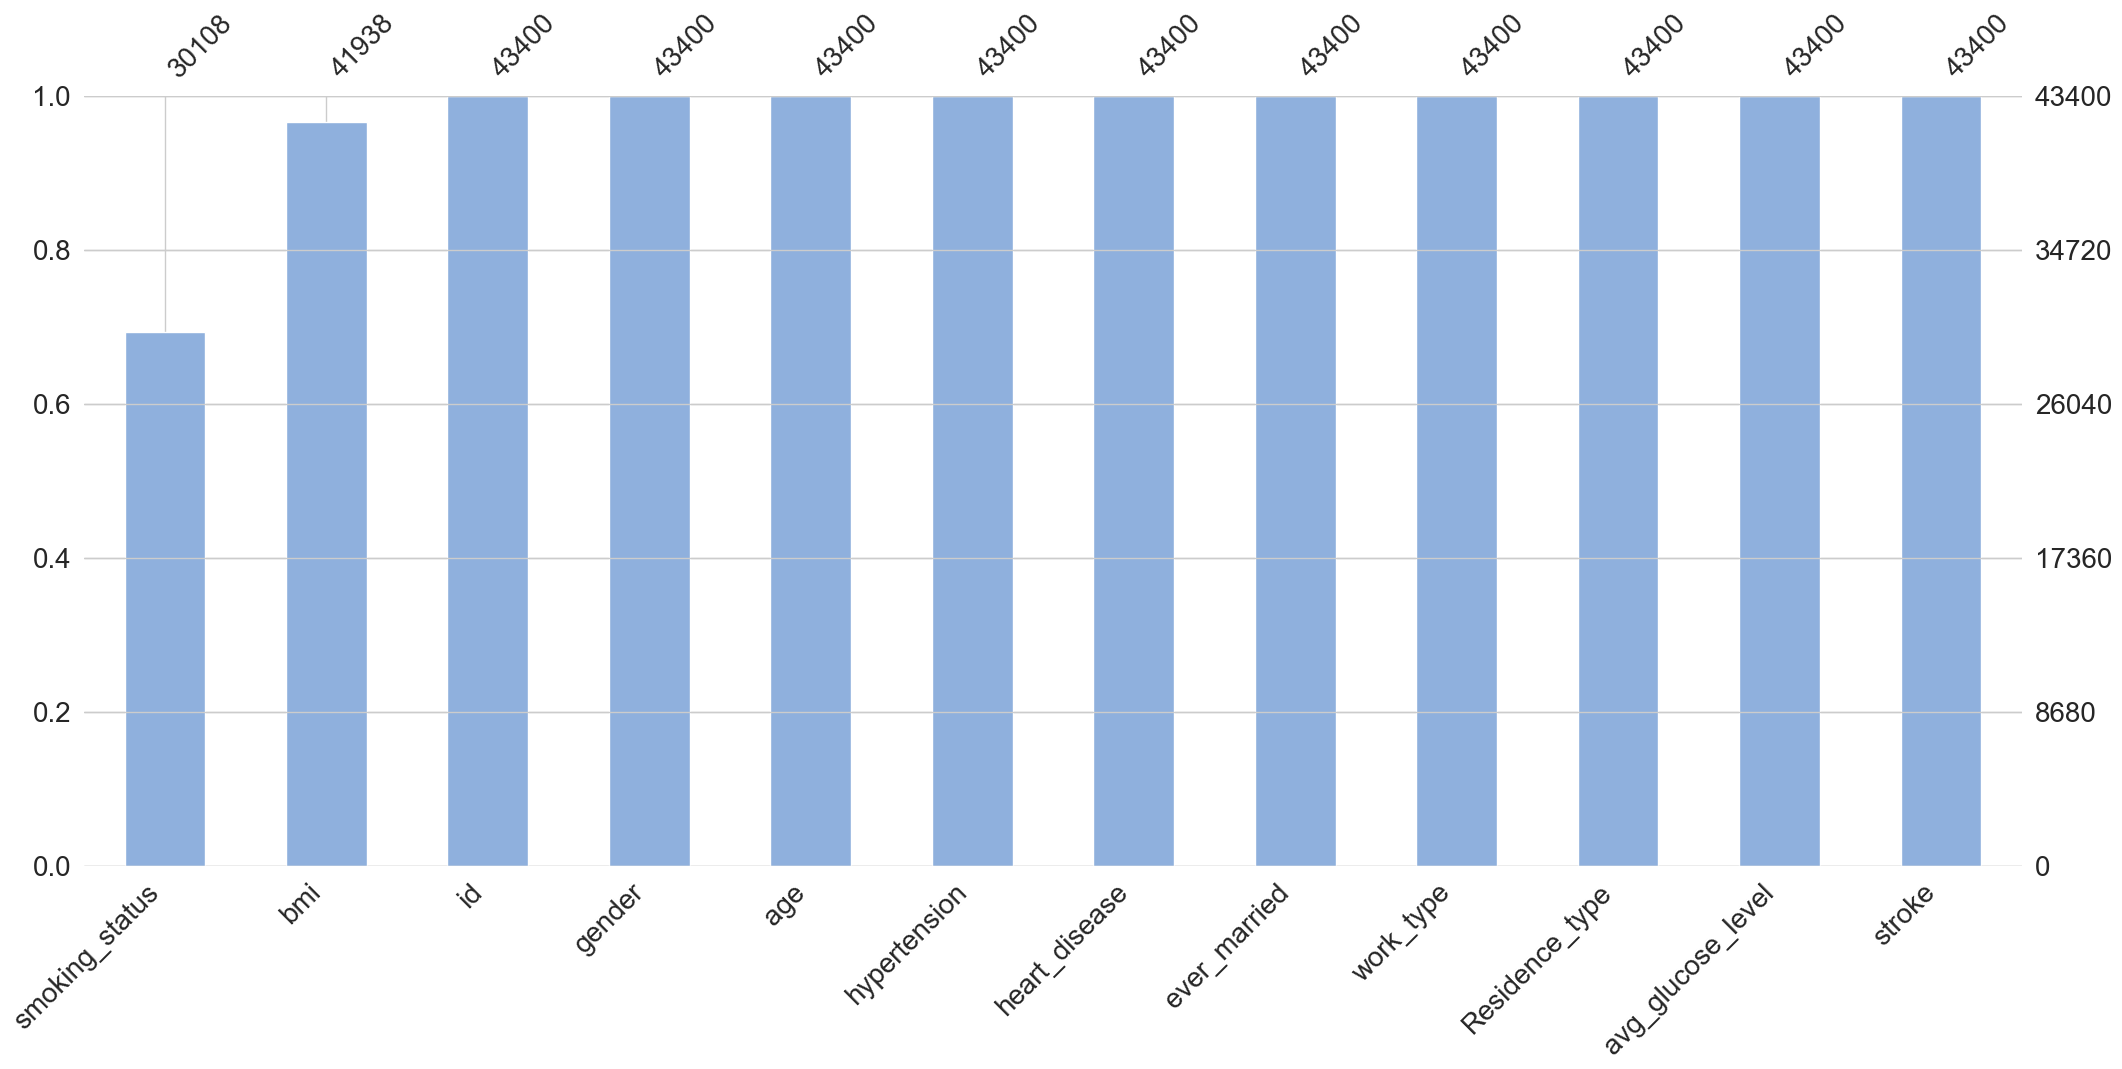

In [86]:
# Импорт библиотеки missingno для визуализации пропущенных значений в данных
import missingno as msno

# Создание графика столбчатой диаграммы с помощью missingno для визуализации пропущенных значений в DataFrame 'data'
# color="#8FB0DD" устанавливает цвет диаграммы
# sort="ascending" сортирует столбцы по возрастанию, помогая выявить паттерны пропущенных значений
# fontsize=20 устанавливает размер шрифта на диаграмме
msno.bar(data, color="#8FB0DD", sort="ascending", fontsize=20)
# из диаграммы видно что столбцы smoking_status , bmi  имеют значения NaN


In [87]:
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

## PREPROCESSING

### Delete ID, удаление колонки. так дальше для работы она нам не понадобиться

In [88]:
# axis='columns' указывает, что мы удаляем столбец, а не строку (axis=1 также может использоваться вместо 'columns')
# inplace=True обозначает, что изменения будут внесены непосредственно в исходный DataFrame
data.drop('id', axis='columns', inplace=True)

In [89]:
data

gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0              Rural              95.12  18.0              NaN       0  
1              Urban              87.96  39.2     never smoked       0  
2              Urban             110.89  17.6              NaN       0  
3              Rural              69.04  35.9  formerly smoked       0  
4              Rural             161.28  19.1              NaN       0  
...              ...                ...   ...              ...     ...  
43395          Urban              58.64  20.4     never smoked       0  
43396          Urban             213.61  55.4  formerly smoked       0  
43397          Urban              91.94  28.9  formerly smoked       0  
43398          Urban              99.16  33.2     never smoked       0  
43399          Urban              79.48  20.6     never smoked       0  

[43400 rows x 11 columns]

## Cleaning Smocking status

In [90]:
#изменение статуса для пациентов в возрасте младше или 10 лет на 'never smoked'
data.loc[data['age'] <= 10, 'smoking_status'] = 'never smoked'

In [91]:
# Удаление строк, содержащих отсутствующие  NaN значения в столбце 'smoking_status'
data = data.dropna (subset=['smoking_status'])

In [92]:
# Подсчет количества отсутствующих значений в столбце 'smoking_status' после удаления.получаем 0
data.smoking_status.isnull().sum()

0

## Сleaning BMI

KNNImputer() - это метод в библиотеке машинного обучения scikit-learn для замены отсутствующих значений (пропусков) в данных с использованием метода k-ближайших соседей (k-nearest neighbors, KNN).

Когда у вас есть набор данных с отсутствующими значениями (NaN или None), KNNImputer() предлагает подход, основанный на методе ближайших соседей, чтобы заполнить эти пропуски. Он использует существующие значения из других признаков для предсказания пропущенных значений на основе ближайших соседей. Этот метод выбирает k ближайших точек данных, вычисляет их расстояние до точки с пропущенным значением и заменяет пропуск на среднее или медианное значение этих k соседей в зависимости от выбора.

In [93]:
# Выбор числовых признаков (столбцов) в DataFrame 'data' с помощью метода select_dtypes
# include=['int64', 'float64'] указывает, что мы хотим выбрать столбцы с числовыми типами данных
numerical_features = data.select_dtypes(include = ['int64','float64']).columns.values

In [94]:
# Инициализация объекта KNNImputer для заполнения пропущенных значений с использованием метода ближайших соседей
num_impute=KNNImputer()

In [95]:
## Обучение KNNImputer на числовых признаках DataFrame 'data'
num_impute.fit(data[numerical_features])


KNNImputer()

In [96]:
# Заполнение пропущенных значений в числовых признаках DataFrame 'data' с помощью обученного KNNImputer
data[numerical_features]= num_impute.transform(data[numerical_features])

In [97]:
# Подсчет количества пропущенных значений в столбце 'bmi' после заполнения
data.bmi.isnull().sum()

0

<Axes: >

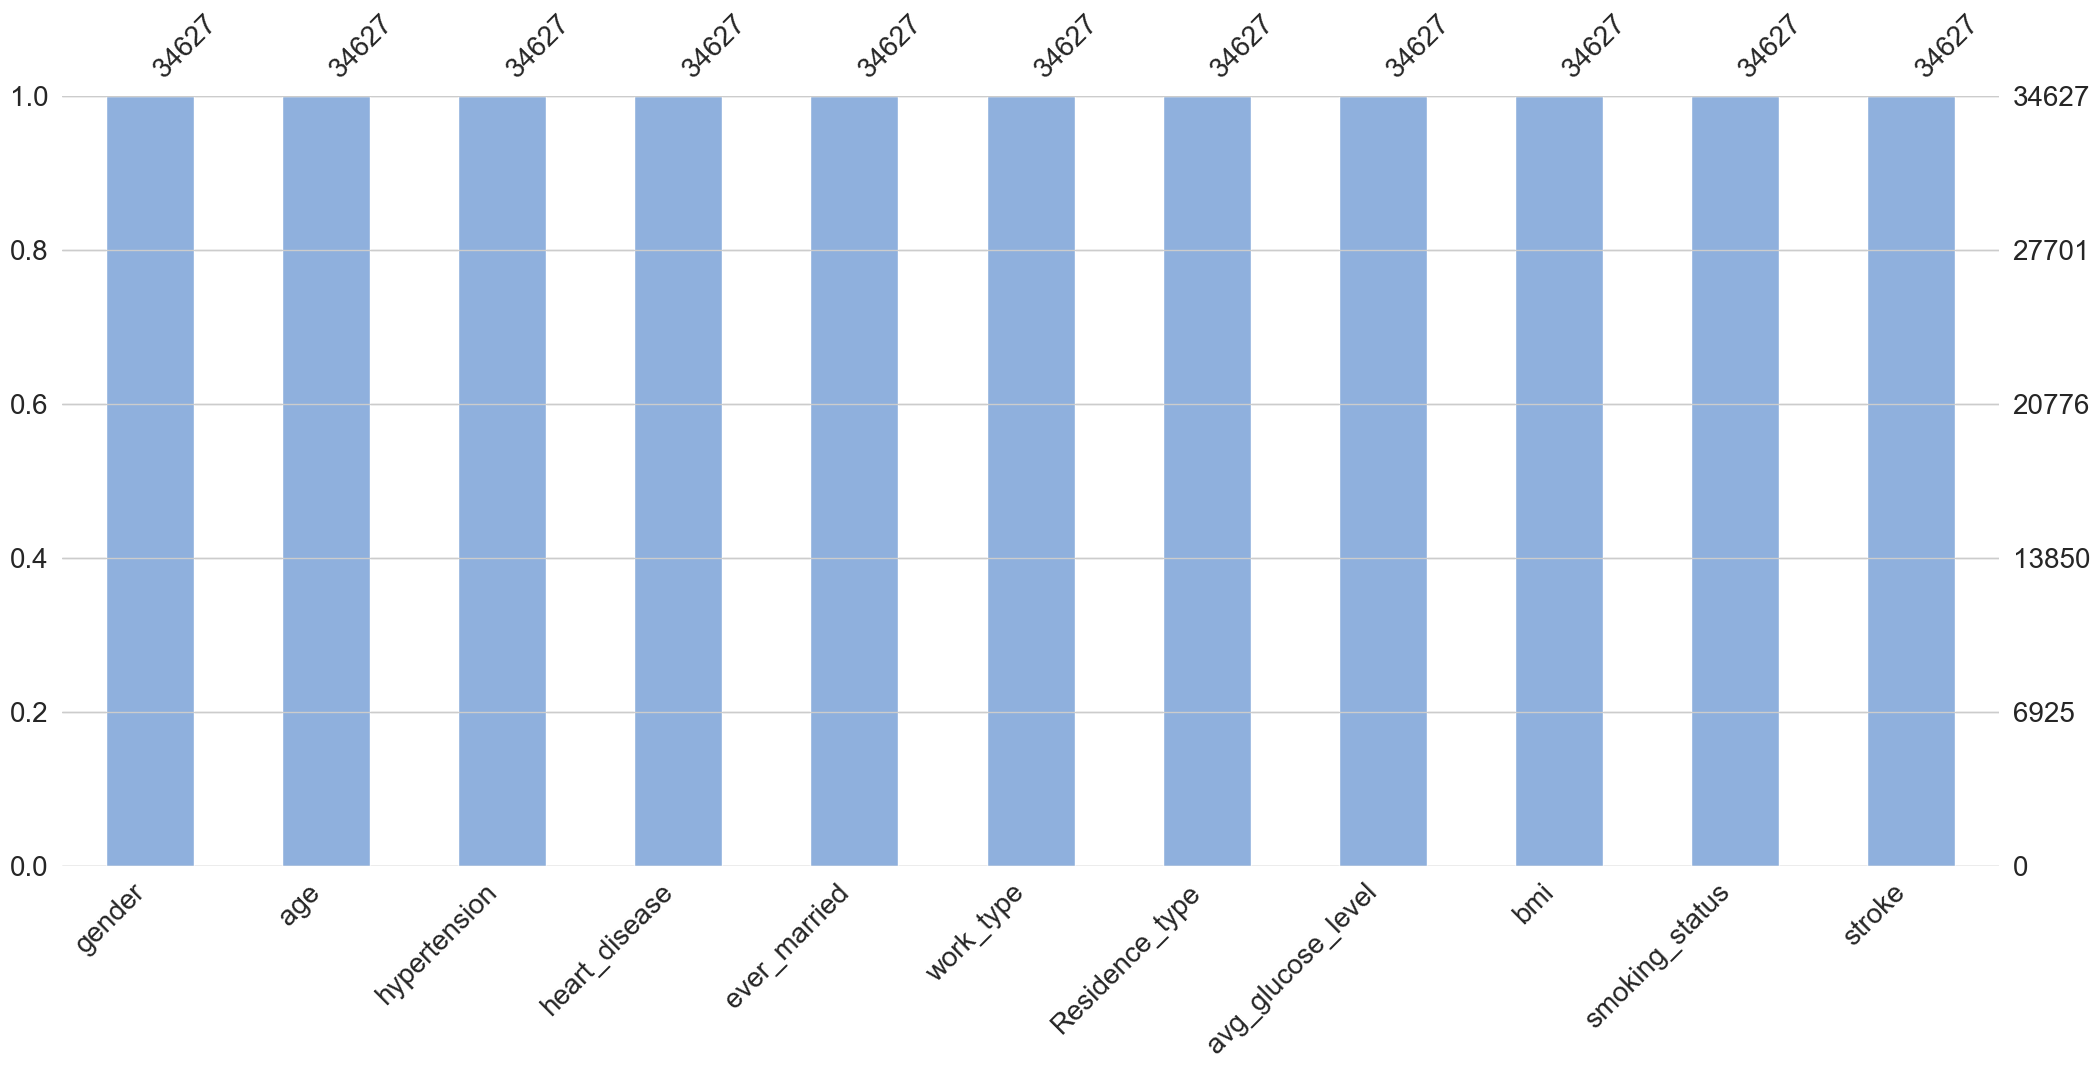

In [98]:
msno.bar(data, color="#8FB0DD", sort="ascending",  fontsize=20)

### Save data without NaN values to make dashboard in tableau

In [99]:
data.to_csv('first.csv', index=False)

## 0/1 for Residence_type, ever_married, gender

In [100]:
# Удаление строк, где значение в столбце 'gender' равно 'Other'
data = data.loc[data['gender'] != 'Other']
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [101]:

# Определение функции preprocess для обработки данных
def prerocess(data):
    # Замена значений в столбце 'Residence_type' на числовые: 'Rural' на 0, 'Urban' на 1
    data['Residence_type']= data['Residence_type'].replace({'Rural': 0, 'Urban':1})
    # Замена значений в столбце 'ever_married' на числовые: 'No' на 0, 'Yes' на 1
    data['ever_married']= data['Residence_type'].replace({'No': 0, 'Yes':1})
    # Замена значений в столбце 'gender' на числовые: 'Male' на 0, 'Female' на 1
    data['gender']= data['gender'].replace({'Male': 0, 'Female':1})
    return data
# Применение функции preprocess к DataFrame 'data' для обработки данных    
prerocess(data)

gender   age  hypertension  heart_disease  ever_married work_type  \
0           0   3.0           0.0            0.0             0  children   
1           0  58.0           1.0            0.0             1   Private   
2           1   8.0           0.0            0.0             1   Private   
3           1  70.0           0.0            0.0             0   Private   
6           1  52.0           0.0            0.0             1   Private   
...       ...   ...           ...            ...           ...       ...   
43395       1  10.0           0.0            0.0             1  children   
43396       1  56.0           0.0            0.0             1  Govt_job   
43397       1  82.0           1.0            0.0             1   Private   
43398       0  40.0           0.0            0.0             1   Private   
43399       1  82.0           0.0            0.0             1   Private   

       Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0                   0              95.12  18.0     never smoked     0.0  
1                   1              87.96  39.2     never smoked     0.0  
2                   1             110.89  17.6     never smoked     0.0  
3                   0              69.04  35.9  formerly smoked     0.0  
6                   1              77.59  17.7  formerly smoked     0.0  
...               ...                ...   ...              ...     ...  
43395               1              58.64  20.4     never smoked     0.0  
43396               1             213.61  55.4  formerly smoked     0.0  
43397               1              91.94  28.9  formerly smoked     0.0  
43398               1              99.16  33.2     never smoked     0.0  
43399               1              79.48  20.6     never smoked     0.0  

[34618 rows x 11 columns]

In [102]:
# Вывод общей информации о DataFrame 'data' после обработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34618 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             34618 non-null  int64  
 1   age                34618 non-null  float64
 2   hypertension       34618 non-null  float64
 3   heart_disease      34618 non-null  float64
 4   ever_married       34618 non-null  int64  
 5   work_type          34618 non-null  object 
 6   Residence_type     34618 non-null  int64  
 7   avg_glucose_level  34618 non-null  float64
 8   bmi                34618 non-null  float64
 9   smoking_status     34618 non-null  object 
 10  stroke             34618 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 3.2+ MB


## EDA EDA означает Exploratory Data Analysis, что на русском можно перевести как "Исследовательский анализ данных".

Эти строки кода создают два поднабора данных: один для случаев инсульта (data_stroke), 
другой для отсутствия инсульта (data_non_stroke). 
Они фильтруют исходный набор данных на основе значения столбца stroke.

data_stroke содержит строки, где значение столбца stroke равно 1, то есть случаи инсульт
. data_non_stroke содержит строки с значениями stroke, равными 0, что означает отсутствие инсульта.

Это полезно для дальнейшего анализа и сравнения характеристик или паттернов между случаями инсульта и их отсутствием.







In [103]:
data_stroke = data[data['stroke']==1]

data_non_stroke = data[data['stroke']==0]

### Boxplot to identify outliers 
Для определения выбросов с помощью boxplot (ящик с усами) можно использовать библиотеки Python
здесь используется бибдиотека PLOTLY

###Использование boxplot### для определения выбросов является частью процесса исследования данных (EDA), который помогает визуализировать и анализировать распределение значений в наборе данных.

Выявление аномалий: Boxplot позволяет увидеть наличие аномальных значений или выбросов в данных. Они могут указывать на ошибки в данных или необычные/нестандартные значения, которые могут повлиять на анализ.

Оценка диапазона данных: Boxplot показывает интерквартильный размах, который позволяет оценить, где распределены основные значения в данных, и выделить значения, которые находятся дальше от типичного распределения.

Сравнение распределений: Этот метод также полезен для сравнения распределений различных переменных или категорий в наборе данных. Он помогает выявить различия в распределениях и возможные необычности.

Использование boxplot является одним из методов первичного анализа данных для выявления потенциальных проблем или особенностей, требующих дальнейшего исследования.

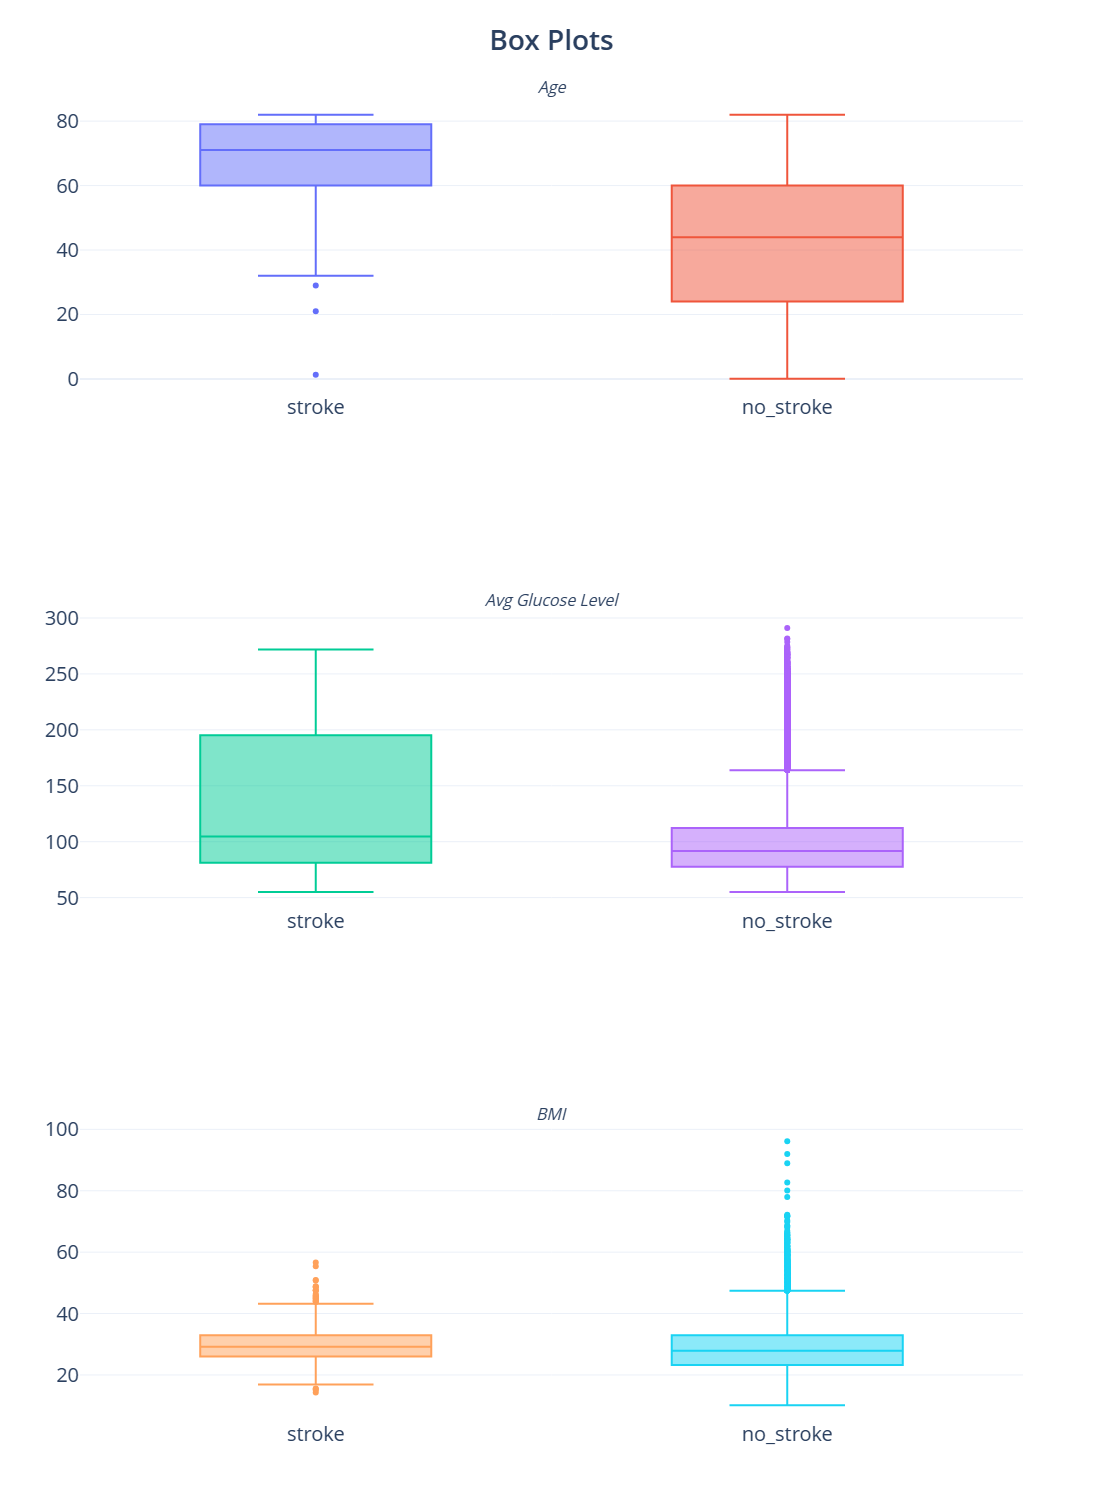

In [104]:
fig=make_subplots(rows=3,cols=1,subplot_titles=('<i>Age', '<i>Avg Glucose Level', '<i>BMI'))

fig.add_trace(go.Box(y=data_stroke['age'], name='stroke'),row=1,col=1)
fig.add_trace(go.Box(y=data_non_stroke['age'], name='no_stroke'),row=1,col=1)


fig.add_trace(go.Box(y=data_stroke['avg_glucose_level'],name='stroke'),row=2,col=1)
fig.add_trace(go.Box(y=data_non_stroke['avg_glucose_level'],name='no_stroke'),row=2,col=1)

fig.add_trace(go.Box(y=data_stroke['bmi'],name='stroke'),row=3,col=1)
fig.add_trace(go.Box(y=data_non_stroke['bmi'],name='no_stroke'),row=3,col=1)


fig.update_layout(height=1500, width=1000, title_text='<b>Box Plots', font_size=20, showlegend=False)
fig.update_layout(template='plotly_white', title_x=0.5, font_family='Open Sans')
pyo.iplot(fig)

### Delete outliers  Удаление выбросов

In [105]:
# Выводим количество строк до удаления выбросов
print('Количество строк до удаления выбросов:', len(data.index))
# Находим выбросы в возрасте, где возраст <= 14 и индикатор инсульта = 1
outliers_age = data[(data['age'] <= 14) & (data['stroke'] == 1)]
# Отображаем найденные выбросы в возрасте
display(outliers_age)
# Удаляем строки с выбросами в возрасте
data = data.drop(outliers_age.index)

# Находим выбросы в индексе массы тела (BMI), где BMI >= 80
outliers_bmi = data[(data['bmi'] >= 80)]
# Отображаем найденные выбросы в индексе массы тела (BMI)
display(outliers_bmi)

# Удаляем строки с выбросами в индексе массы тела (BMI)
data = data.drop(outliers_bmi.index)
# Выводим количество строк после удаления выбросов
print('number of rows after delete outliers:', len(data.index))

Количество строк до удаления выбросов: 34618


gender   age  hypertension  heart_disease  ever_married work_type  \
9961       1  1.32           0.0            0.0             1  children   

      Residence_type  avg_glucose_level    bmi smoking_status  stroke  
9961               1              70.37  18.36   never smoked     1.0

gender   age  hypertension  heart_disease  ever_married work_type  \
4026        0  38.0           1.0            0.0             0   Private   
10322       0   6.0           0.0            0.0             1  children   
30650       1  34.0           0.0            0.0             1   Private   
34824       1  47.0           1.0            0.0             1   Private   
43087       0  78.0           1.0            0.0             0   Private   

       Residence_type  avg_glucose_level   bmi smoking_status  stroke  
4026                0              56.90  92.0   never smoked     0.0  
10322               1              58.33  96.1   never smoked     0.0  
30650               1             199.13  80.1   never smoked     0.0  
34824               1             238.47  82.7   never smoked     0.0  
43087               0             135.73  89.0   never smoked     0.0

number of rows after delete outliers: 34612


## EDA Gender  "Исследовательский анализ данных" по половому признаку

Этот код создаёт новый DataFrame data_gender, группируя данные по переменной "gender"
и подсчитывая количество наблюдений в каждой группе. 
Результат сохраняется в переменную data_gender и выводится на экран для просмотра.

In [106]:
## Группируем данные по переменной "gender" и считаем количество наблюдений в каждой группе
data_gender = data.groupby(['gender'])['gender'].count().reset_index(name='count')

data_gender

gender  count
0       0  14056
1       1  20556

In [107]:
import plotly.express as px

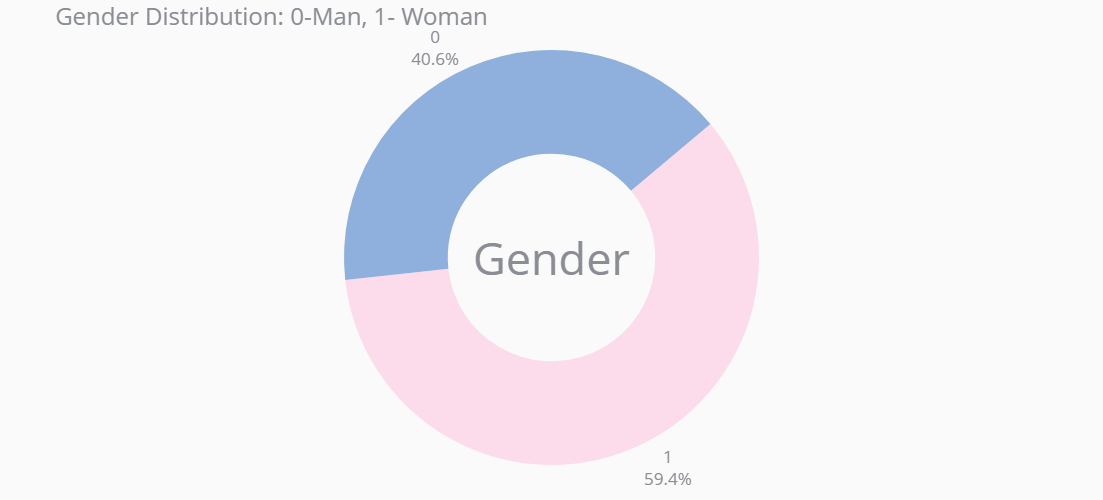

In [108]:
fig = px.pie(data_gender, names='gender', values='count',height=500, width=900, hole=0.5, title='Gender Distribution: 0-Man, 1- Woman',
                   color_discrete_sequence=['#FCDCEB', '#8FB0DD'])
fig.update_traces(hovertemplate=None, textposition='outside',
 textinfo='percent+label', rotation=50)
fig.update_layout(margin=dict(t=50, b=35, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=45,
                        text="Gender"))


In [109]:
#Здесь данные data_stroke группируются по столбцу 'gender'. 
#Это означает, что данные будут разделены на группы в зависимости от уникальных значений в столбце 'gender'.
#После группировки код считает количество элементов в каждой группе. Это подсчитывает количество записей в каждой группе 'gender'.
# Данный код сбрасывает индекс результата предыдущей операции (groupby и подсчёт) и создаёт новый индекс, начиная с 0. 
#Столбец с подсчитанными значениями будет иметь имя 'count'.
data_gender_stroke = data_stroke.groupby(['gender'])['gender'].count().reset_index(name='count')

data_gender_stroke


gender  count
0       0    278
1       1    361

In [110]:
# Эта строка фильтрует данные data_stroke для женщин (предполагая, что 1 представляет женский пол в столбце 'gender') 
#и считает количество записей. 
#female_st будет содержать количество записей о женщинах, полученных после фильтрации.
female_st = data_stroke.loc[data_stroke.gender == 1].count()[0]
#Аналогично первой строке, но здесь фильтруются данные для мужчин (предполагая, что 0 представляет мужской пол в столбце 'gender') и считается количество записей. 
#male_st будет содержать количество записей о мужчинах с инсультами, полученных после фильтрации.
male_st = data_stroke.loc[data_stroke.gender == 0].count()[0]

#Эта строка аналогична первой строке, но фильтрует данные data_non_stroke для женщин без инсульта (предполагая, что 1 представляет женский пол в столбце 'gender') 
#и считает количество записей.female__no_st будет содержать количество записей о женщинах без инсульта.
female__no_st = data_non_stroke.loc[data_non_stroke.gender == 1].count()[0]

#Аналогично предыдущей строке, но здесь фильтруются данные для мужчин без инсульта (предполагая, что 0 представляет мужской пол в столбце 'gender') и считается количество записей.
#male__no_st будет содержать количество записей о мужчинах без инсульта.
male__no_st = data_non_stroke.loc[data_non_stroke.gender == 0].count()[0]

#Здесь создается DataFrame df_gender, в котором будут отображены четыре категории: женщины с инсультами, мужчины с инсультами, женщины без инсульта, мужчины без инсульта. 
#Каждая категория будет содержать количество соответствующих записей.
df_gender = pd.DataFrame({'name': ['Female', 'Male'],
                   'STROKE': [female_st, male_st],
                  'NO_STROKE': [female__no_st, male__no_st]})
df_gender

name  STROKE  NO_STROKE
0  Female     361      20198
1    Male     278      13781

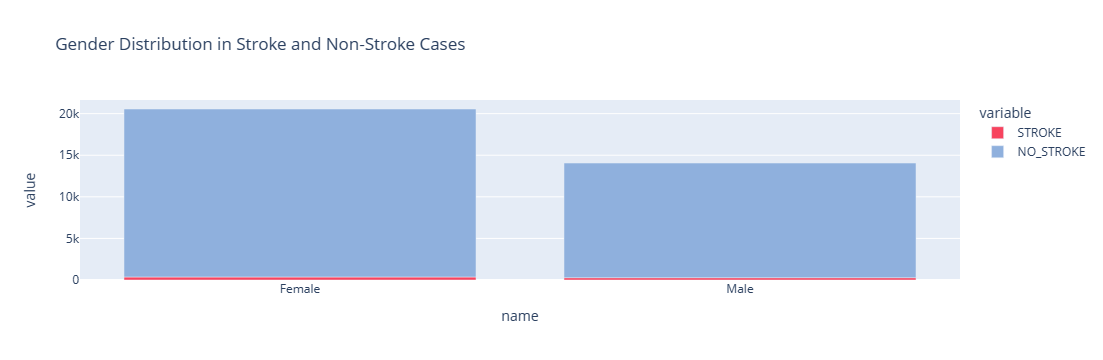

In [111]:
fig = px.bar(df_gender, x="name", y=["STROKE", "NO_STROKE"], title="Gender Distribution in Stroke and Non-Stroke Cases", color_discrete_sequence=['#F7435E', '#8FB0DD'])
fig.show()

# hypertension

Этот код вычисляет количество значений гипертонии в датасете, связанных с ним инсультами и без них, и организует эту информацию в DataFrame для удобного сравнения между двумя категориями: случаи инсульта и их отсутствие. Полученный DataFrame df_hypertension будет содержать столбцы с подсчетами гипертонии для случаев инсульта и без них.

In [112]:
## Подсчет вхождений значений 'гипертония' в наборе данных 'data_stroke', где гипертония равна 1
hypertension_1 = data_stroke.loc[data_stroke.hypertension == 1].count()[0]
# Подсчет вхождений значений 'гипертония' в наборе данных 'data_stroke', где гипертония равна 0
hypertension_0 = data_stroke.loc[data_stroke.hypertension == 0].count()[0]
# Подсчет вхождений значений 'гипертония' в наборе данных 'data_non_stroke', где гипертония равна 1
hypertension1__no_st = data_non_stroke.loc[data_non_stroke.hypertension == 1].count()[0]
# Подсчет вхождений значений 'гипертония' в наборе данных 'data_non_stroke', где гипертония равна 0
hypertension0__no_st = data_non_stroke.loc[data_non_stroke.hypertension == 0].count()[0]
# Создание DataFrame для обобщения количества значений 'гипертония' для случаев инсульта и его отсутствия
df_hypertension = pd.DataFrame({'hypertension': ['hypertension', 'No_hypertension'],
                   'STROKE': [hypertension_1, hypertension_0],
                  'NO_STROKE': [hypertension1__no_st, hypertension0__no_st]})
df_hypertension

hypertension  STROKE  NO_STROKE
0     hypertension     177       3352
1  No_hypertension     462      30627

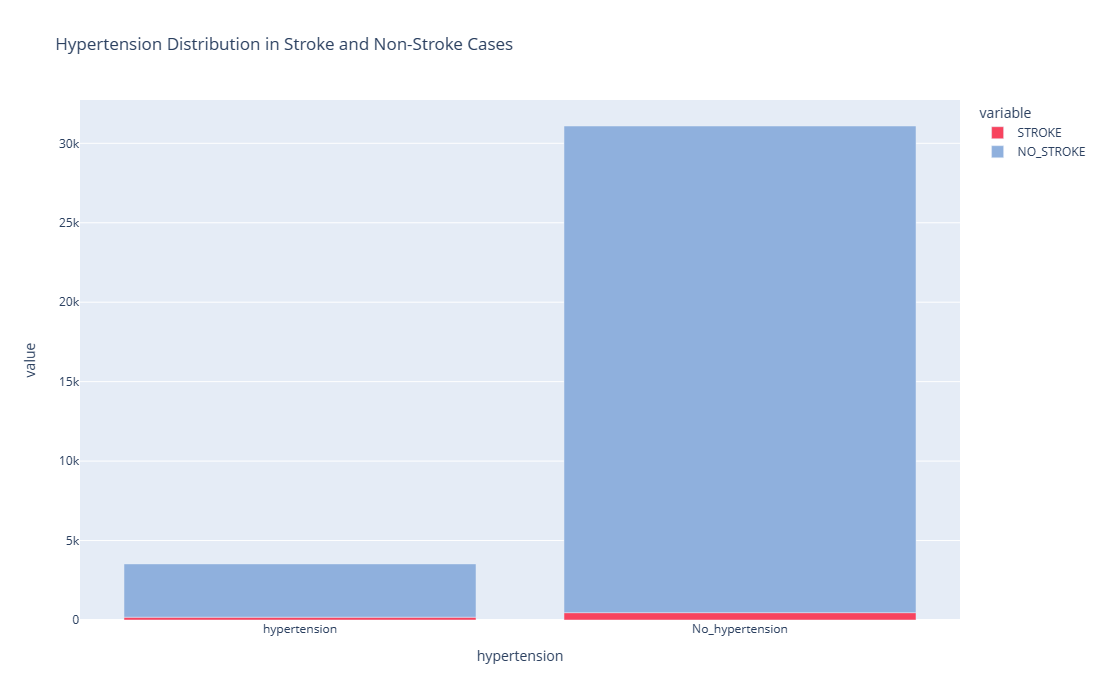

In [113]:
fig = px.bar(df_hypertension, x="hypertension", y=["STROKE", "NO_STROKE"], 
             title="Hypertension Distribution in Stroke and Non-Stroke Cases", color_discrete_sequence=['#F7435E', '#8FB0DD'],
             width=1000, height=700)
fig.show()

## Family status

Этот код проводит анализ данных о семейном статусе в случаях с инсультом и без него. 
Он подсчитывает количество значений 'женат/замужем' и 'не женат/не замужем' для обеих категорий и создает столбчатую диаграмму (bar chart) с использованием библиотеки plotly для визуализации этих данных.

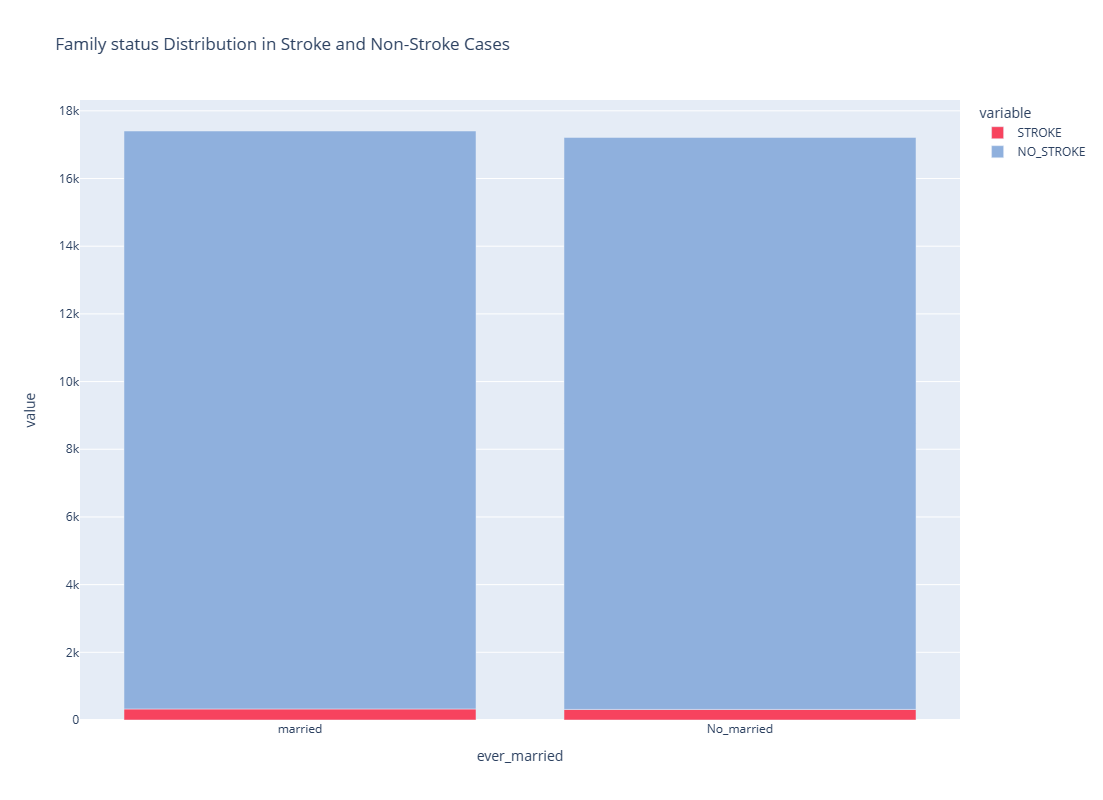

In [114]:
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_stroke', где ever_married равен 1
ever_married_1 = data_stroke.loc[data_stroke.ever_married == 1].count()[0]
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_stroke', где ever_married равен 0
ever_married_0 = data_stroke.loc[data_stroke.ever_married == 0].count()[0]
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_non_stroke', где ever_married равен 1
ever_married1__no_st = data_non_stroke.loc[data_non_stroke.ever_married == 1].count()[0]
# Подсчет вхождений значений 'ever_married' в наборе данных 'data_non_stroke', где ever_married равен 0
ever_married0__no_st = data_non_stroke.loc[data_non_stroke.ever_married == 0].count()[0]
# Создание DataFrame для обобщения количества значений 'ever_married' для случаев инсульта и его отсутствия

df_ever_married = pd.DataFrame({'ever_married': ['married', 'No_married'],
                   'STROKE': [ever_married_1, ever_married_0],
                  'NO_STROKE': [ever_married1__no_st, ever_married0__no_st]})
fig = px.bar(df_ever_married, x="ever_married", y=["STROKE", "NO_STROKE"], 
             title=" Family status Distribution in Stroke and Non-Stroke Cases", color_discrete_sequence=['#F7435E', '#8FB0DD'],
             width=1000, height=800)
fig.show()

## Work type

Этот блок кода предназначен для визуализации распределения типов работы (work_type) в наборе данных

In [115]:
#Этот код выводит уникальные значения, которые принимает колонка "work_type" в датасете. 
#Это позволяет понять, какие типы работы присутствуют в данных.
data["work_type"].unique()

array(['children', 'Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

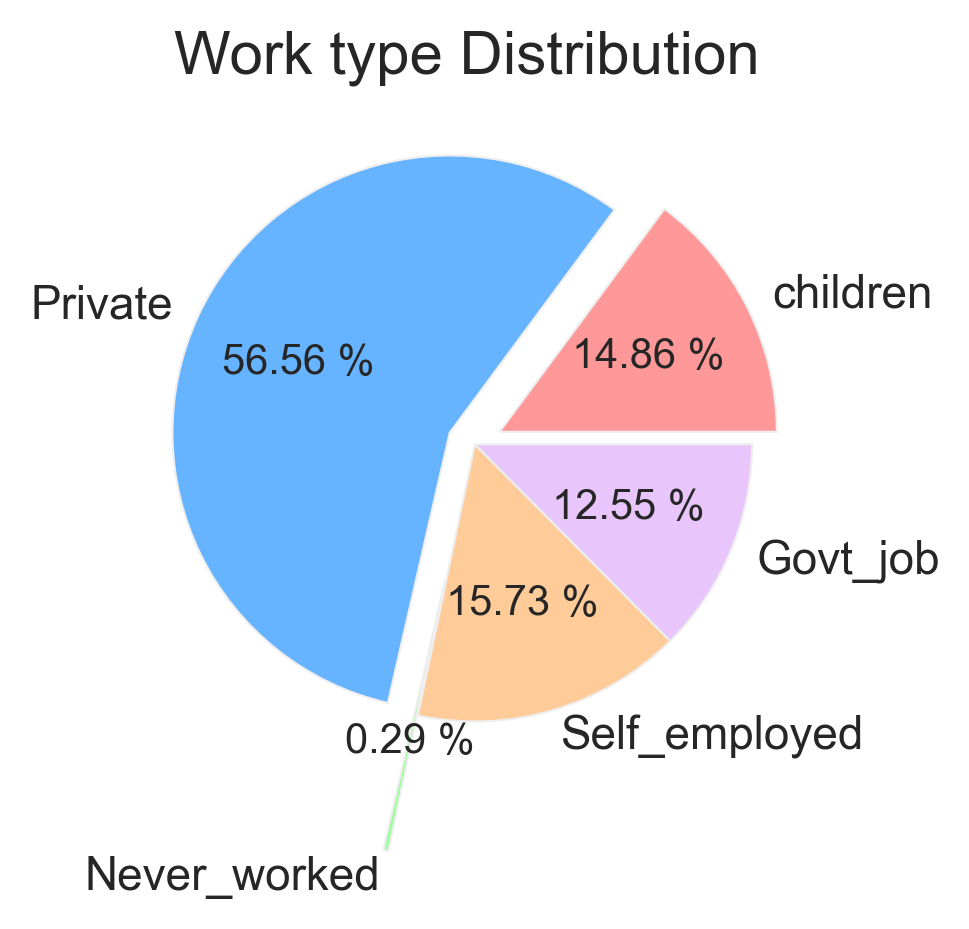

In [116]:
plt.figure(figsize = (3,3), dpi = 300)

plt.style.use('ggplot')
children = data.loc[data.work_type == 'children'].count()[0]
Private = data.loc[data.work_type == 'Private'].count()[0]
Never_worked = data.loc[data.work_type == 'Never_worked'].count()[0]
Self_employed = data.loc[data.work_type == 'Self-employed'].count()[0]
Govt_job = data.loc[data.work_type == 'Govt_job'].count()[0]
labels = ['children', 'Private', 'Never_worked', 'Self_employed', 'Govt_job']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#e8c5fa']
work = [children, Private, Never_worked, Self_employed, Govt_job]
explode = (.1, .1, 0.5, 0, 0)
plt.title("Work type Distribution ")
plt.pie(work, labels = labels, autopct = '%.2f %%', pctdistance =0.6, explode = explode, colors=colors)
plt.show()

**Анализ 'work status**  столбчатая диаграмма (bar chart)

***Этот блок кода*** анализирует распределение типов работы ('work_type') в случаях с инсультами и без них. Он подсчитывает количество каждого типа работы для обеих категорий (инсульт и его отсутствие) и создает столбчатую диаграмму (bar chart) для визуализации этих данных с использованием библиотеки plotly.

Для каждого типа работы (например, 'children', 'Private', 'Self-employed', 'Govt_job', 'Never_worked') этот блок кода подсчитывает количество случаев с инсультом (STROKE) и количество случаев без инсульта (NO_STROKE). Затем эти данные организуются в DataFrame df_worktype, который используется для создания столбчатой диаграммы. В этой диаграмме каждый столбец представляет конкретный тип работы, а высота столбцов показывает количество случаев инсульта и его отсутствия для каждой категории.

График (fig) отображает распределение типов работы в случаях с инсультом и без него, помогая визуально сравнить, какие типы работы более распространены или связаны с наличием или отсутствием инсульта.

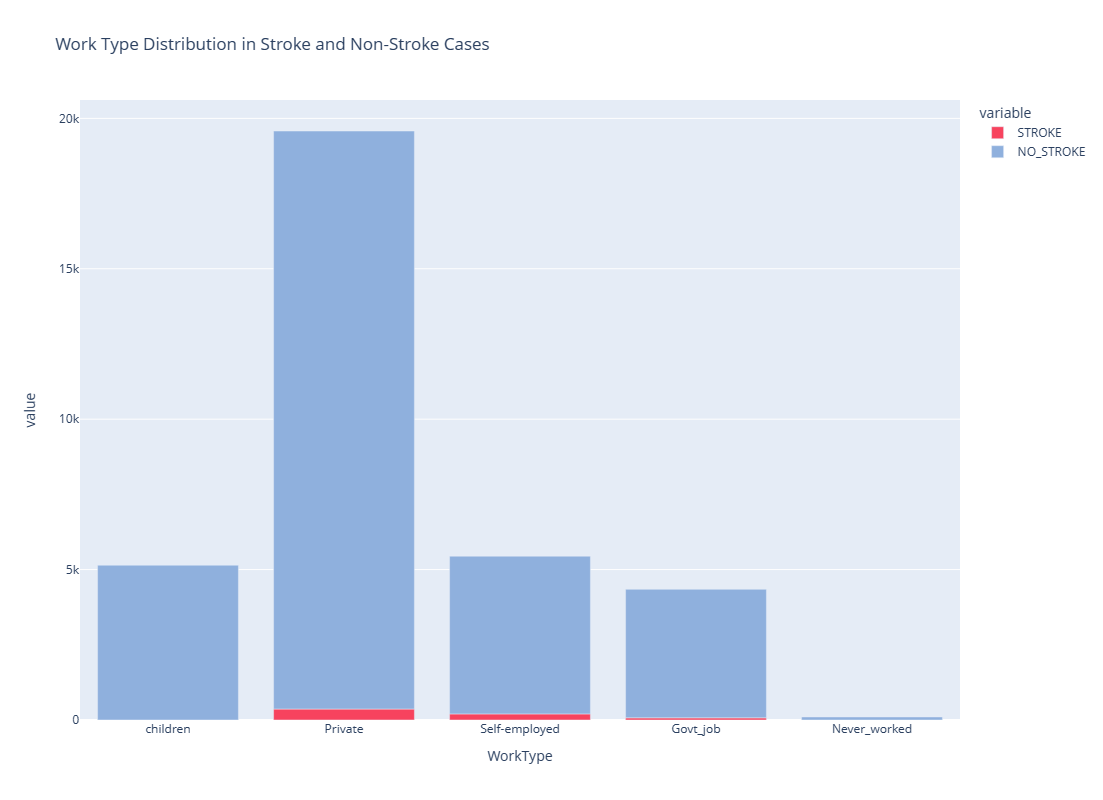

In [117]:
children_st = data_stroke.loc[data_stroke.work_type == "children"].count()[0]
private_st = data_stroke.loc[data_stroke.work_type == "Private"].count()[0]
self_employed_st = data_stroke.loc[data_stroke.work_type == "Self-employed"].count()[0]
govt_job_worked_st = data_stroke.loc[data_stroke.work_type == "Govt_job"].count()[0]
never_worked_st = data_stroke.loc[data_stroke.work_type == "Never_worked"].count()[0]


children__no_st = data_non_stroke.loc[data_non_stroke.work_type == "children"].count()[0]
private_no_st = data_non_stroke.loc[data_non_stroke.work_type == "Private"].count()[0]
self_employed_no_st = data_non_stroke.loc[data_non_stroke.work_type == "Self-employed"].count()[0]
govt_job_worked_no_st = data_non_stroke.loc[data_non_stroke.work_type == "Govt_job"].count()[0]
never_worked_no_st = data_non_stroke.loc[data_non_stroke.work_type == "Never_worked"].count()[0]


df_worktype= pd.DataFrame({'WorkType': ['children', 'Private', 'Self-employed', 'Govt_job', 'Never_worked'],
                   'STROKE': [children_st, private_st, self_employed_st, govt_job_worked_st, never_worked_st ],
                  'NO_STROKE': [children__no_st, private_no_st, self_employed_no_st, govt_job_worked_no_st, never_worked_no_st ]})
fig = px.bar(df_worktype, x="WorkType", y=["STROKE", "NO_STROKE"], 
             title="Work Type Distribution in Stroke and Non-Stroke Cases", color_discrete_sequence=['#F7435E', '#8FB0DD'],
             width=1000, height=800)
fig.show()

## smoking status
**Анализ статуса курильщика** для пацм=иентов с инсультом и без него столбчатая диаграмма (bar chart)

Этот блок кода анализирует распределение статусов курения ('smoking_status') среди пациентов с инсультами и без них. Код подсчитывает количество пациентов для каждого статуса курения ('never smoked', 'formerly smoked', 'smokes') в двух категориях - с инсультом и без него. Затем эта информация используется для создания столбчатой диаграммы (bar chart) с помощью библиотеки plotly.

Для каждого статуса курения (например, 'never smoked', 'formerly smoked', 'smokes') этот блок кода подсчитывает количество случаев инсульта (STROKE) и количество случаев без инсульта (NO_STROKE). Эти данные организуются в DataFrame df_smoking_status, который используется для создания столбчатой диаграммы. В данной диаграмме каждый столбец соответствует конкретному статусу курения, а высота столбцов отображает количество случаев инсульта и его отсутствия для каждой категории статуса курения.

График (fig) показывает распределение статусов курения среди пациентов с инсультами и без него, что позволяет визуально сравнить, как статус курения может быть связан с наличием или отсутствием инсул







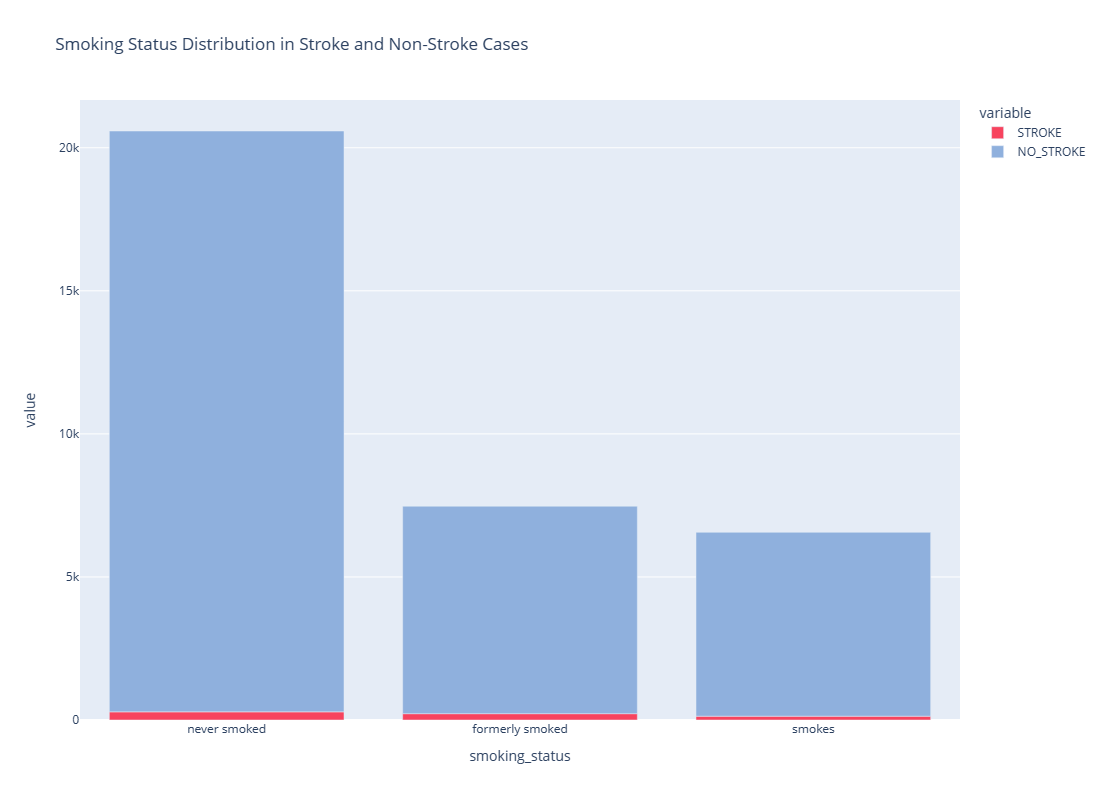

In [118]:
never_smoked_st = data_stroke.loc[data_stroke.smoking_status == "never smoked"].count()[0]
formerly_smoked_st = data_stroke.loc[data_stroke.smoking_status == "formerly smoked"].count()[0]
smokes_employed_st = data_stroke.loc[data_stroke.smoking_status == "smokes"].count()[0]



never_smoked__no_st = data_non_stroke.loc[data_non_stroke.smoking_status == "never smoked"].count()[0]
formerly_smoked_no_st = data_non_stroke.loc[data_non_stroke.smoking_status == "formerly smoked"].count()[0]
smokes_no_st = data_non_stroke.loc[data_non_stroke.smoking_status == "smokes"].count()[0]



df_smoking_status= pd.DataFrame({'smoking_status': ['never smoked', 'formerly smoked', 'smokes'],
                   'STROKE': [never_smoked_st, formerly_smoked_st, smokes_employed_st ],
                  'NO_STROKE': [never_smoked__no_st, formerly_smoked_no_st, smokes_no_st ]})
fig = px.bar(df_smoking_status, x="smoking_status", y=["STROKE", "NO_STROKE"], 
             title="Smoking Status Distribution in Stroke and Non-Stroke Cases", color_discrete_sequence=['#F7435E', '#8FB0DD'],
             width=1000, height=800)

fig.show()

## heart_disease

Этот блок кода анализирует распределение наличия сердечных заболеваний ('heart_disease') среди пациентов с инсультами и без них. Код подсчитывает количество случаев, где у пациентов было сердечное заболевание ('heart_disease == 1') и где его не было ('heart_disease == 0') в двух категориях - с инсультом и без него. Затем эта информация используется для создания столбчатой диаграммы (bar chart) с помощью библиотеки plotly.

Для двух категорий, имеющих или не имеющих сердечное заболевание ('have heart disease', 'no heart disease'), код подсчитывает количество случаев инсульта (STROKE) и количество случаев без инсульта (NO_STROKE). Затем эти данные организуются в DataFrame df_heart_disease, который используется для создания столбчатой диаграммы. В данной диаграмме каждый столбец соответствует наличию или отсутствию сердечного заболевания, а высота столбцов отображает количество случаев инсульта и его отсутствия для каждой категории.

График (fig) демонстрирует распределение наличия сердечных заболеваний среди пациентов с инсультами и без него, помогая визуально оценить, как наличие сердечного заболевания может быть связано с наличием или отсутствием инсульта.

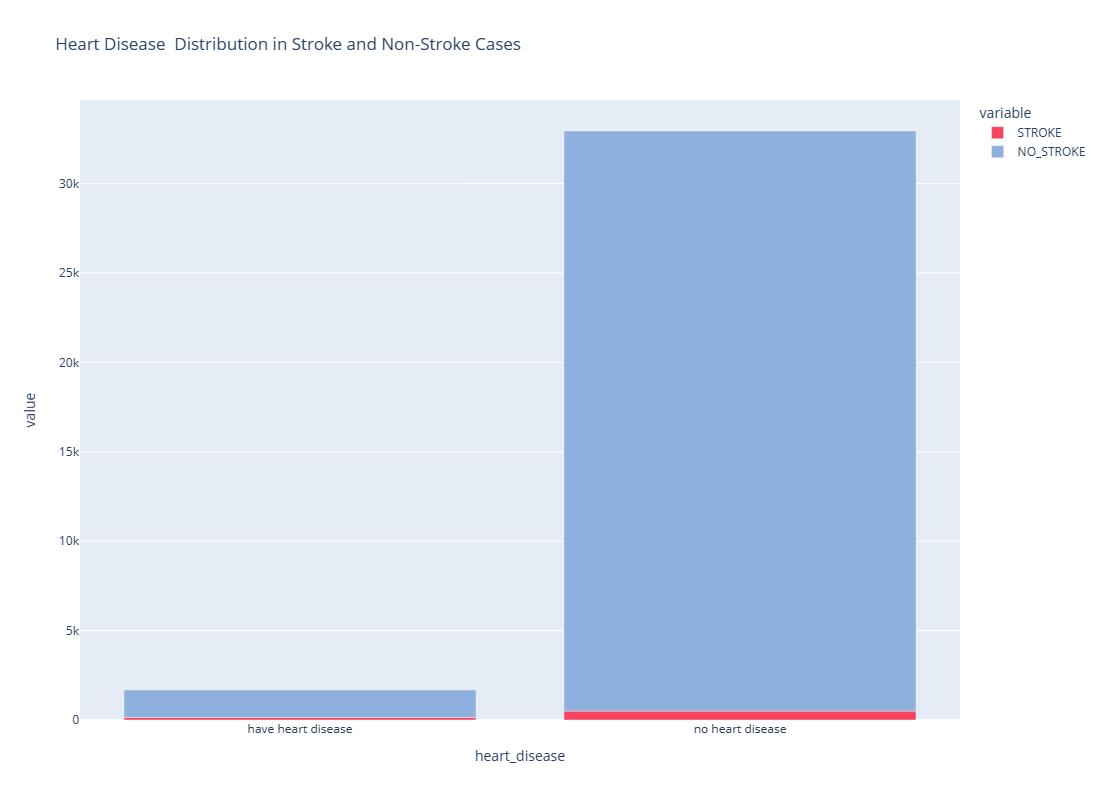

In [119]:
heartdisease_st = data_stroke.loc[data_stroke.heart_disease == 1].count()[0]
noheartdisease_st = data_stroke.loc[data_stroke.heart_disease == 0].count()[0]



heart_disease__no_st = data_non_stroke.loc[data_non_stroke.heart_disease == 1].count()[0]
noheart_disease_no_st = data_non_stroke.loc[data_non_stroke.heart_disease == 0].count()[0]




df_heart_disease= pd.DataFrame({'heart_disease': ['have heart disease', 'no heart disease'],
                   'STROKE': [heartdisease_st, noheartdisease_st ],
                  'NO_STROKE': [heart_disease__no_st, noheart_disease_no_st]})
fig = px.bar(df_heart_disease, x="heart_disease", y=["STROKE", "NO_STROKE"], 
             title="Heart Disease  Distribution in Stroke and Non-Stroke Cases", color_discrete_sequence=['#F7435E', '#8FB0DD'],
             width=1000, height=800)

fig.show()

In [120]:
#Процент сердечных заболеваний среди пациентов с инсультом
pr_stroke_hd =(142/639)*100
pr_stroke_hd

22.22222222222222

In [121]:
#Процент сердечных заболеваний среди пациентов без инсульта
pr_nostroke_hd =(1539/33979)*100
pr_nostroke_hd

4.529268077341888

## EDA AGE

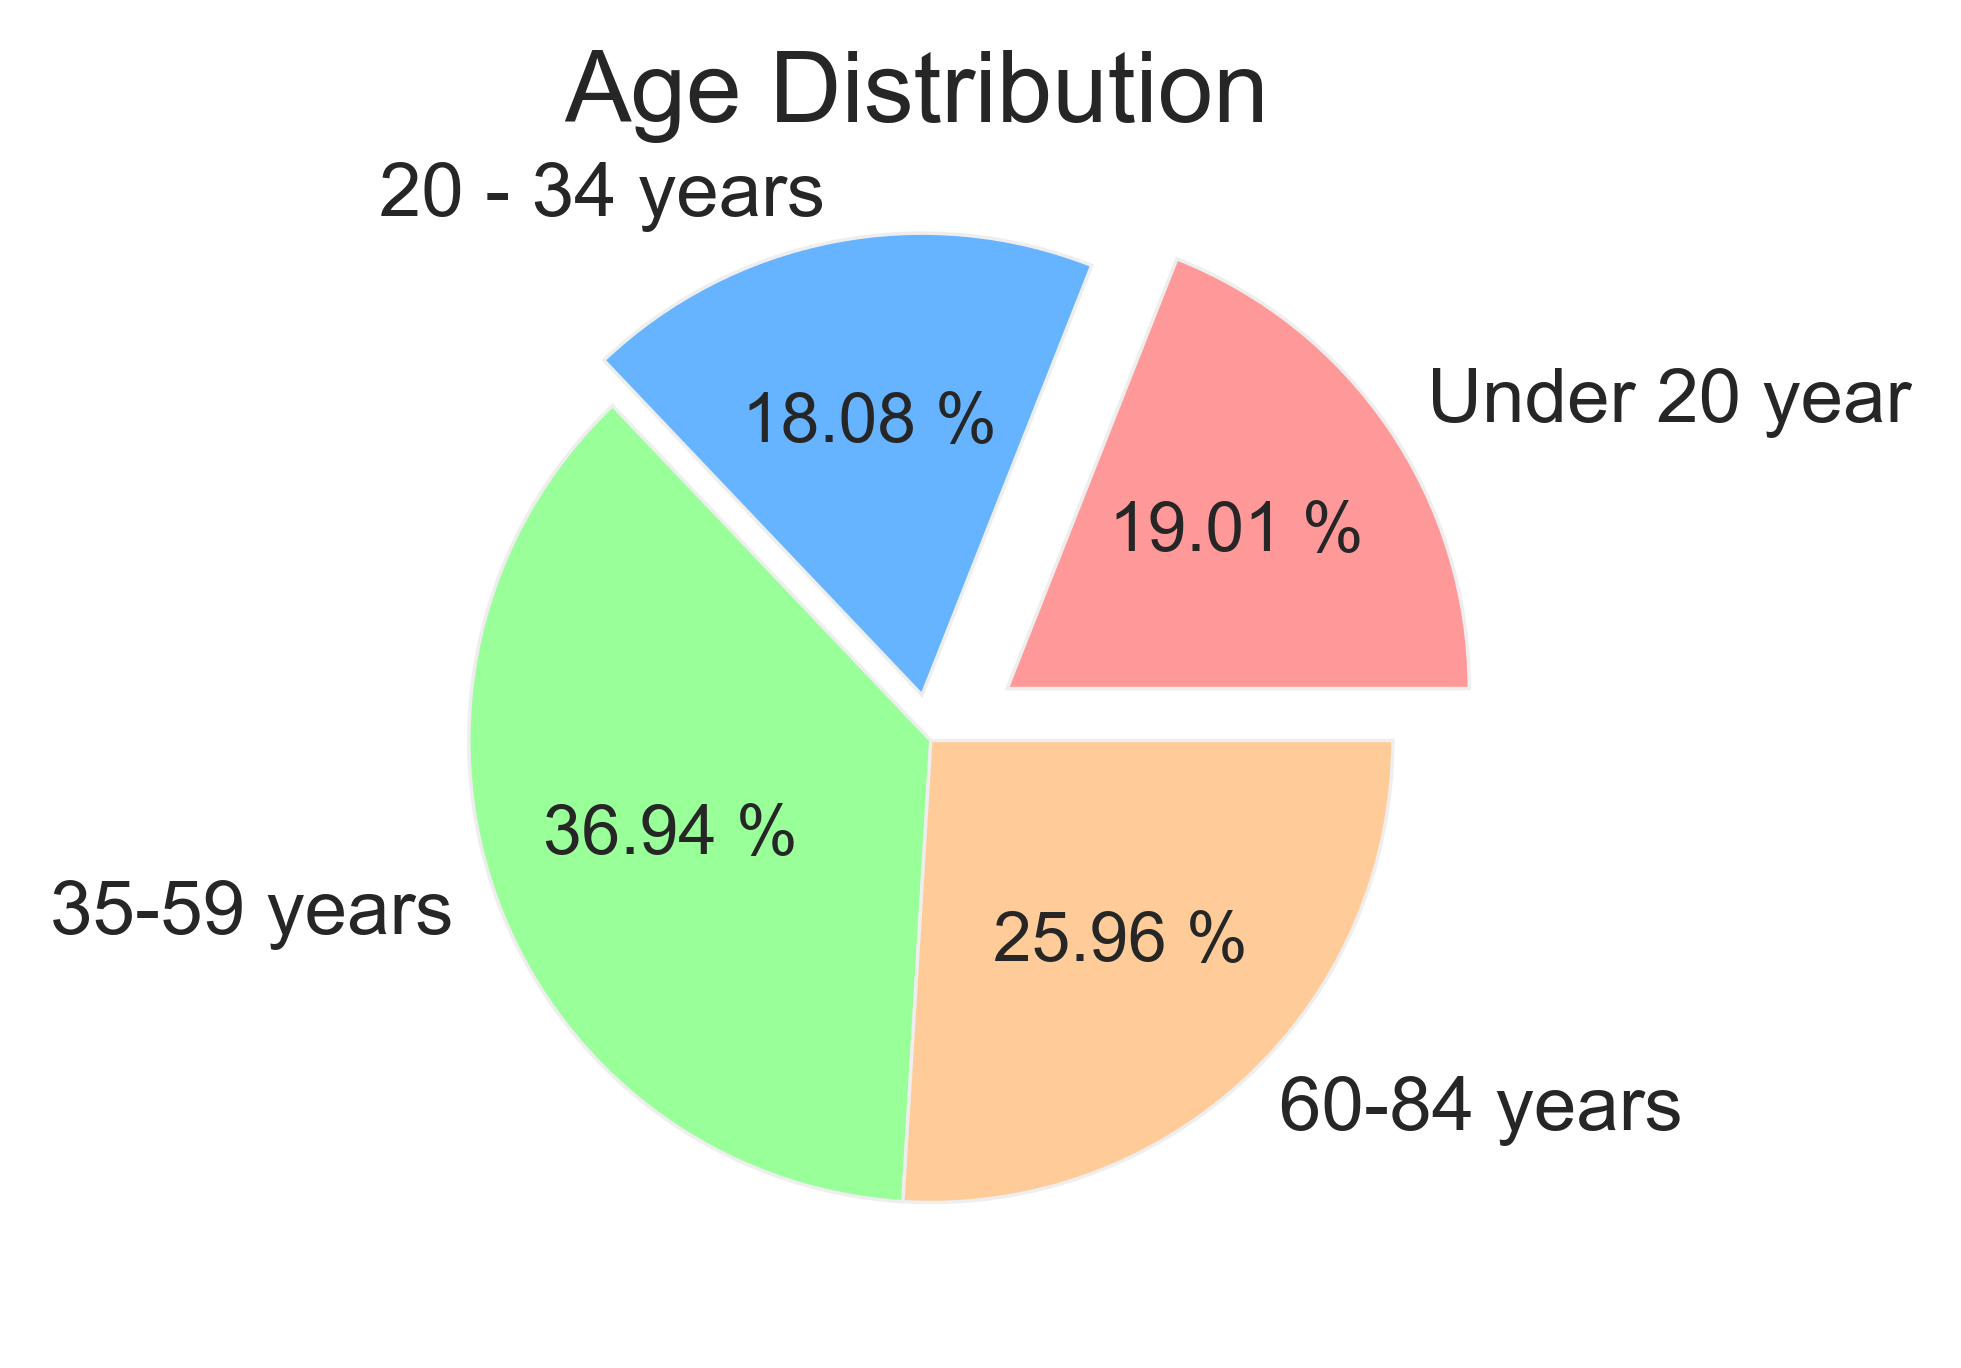

In [122]:
plt.figure(figsize = (3,3), dpi = 500)

plt.style.use('ggplot')
children_teen = data.loc[data.age < 20].count()[0]
young = data.loc[(data.age >= 20)&(data.age < 35)].count()[0]
medium = data.loc[(data.age >= 35)&(data.age < 60)].count()[0]
old = data.loc[(data.age >= 60)&(data.age < 83)].count()[0]
labels = ['Under 20 year', '20 - 34 years', '35-59 years', '60-84 years']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ages = [children_teen,young,medium,old]
explode = (.2, .1, 0, 0)
plt.title("Age Distribution ")
plt.pie(ages, labels = labels, autopct = '%.2f %%', pctdistance =0.6, explode = explode, colors=colors)
plt.show()


Этот код создает график распределения возраста пациентов из предоставленных данных.
Функция distplot из библиотеки seaborn позволяет отобразить распределение данных по указанному столбцу.
На основе этого графика можно сделать выводы о том, какие возрастные диапазоны более часто встречаются в данных, а какие менее.
Кривая графика показывает, как вероятность значения возраста меняется по всему диапазону возможных значений.


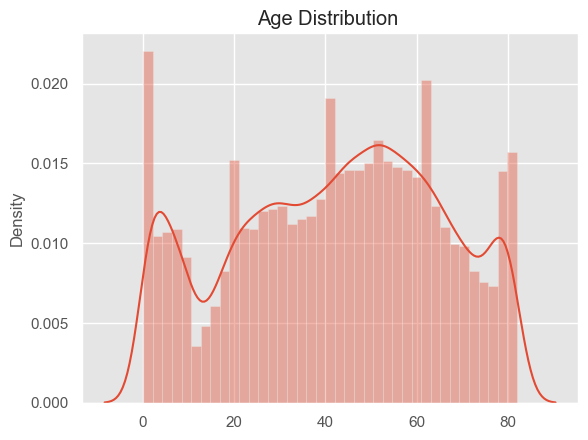

In [123]:
age = pd.DataFrame(data['age'])
res = sns.distplot(age)
plt.title("Age Distribution ")
plt.show()

 **Этот код визуализирует распределение возраста пациентов с инсультом и без него, 
 позволяя сравнить, как возраст связан с наличием или отсутствием инсульта.**


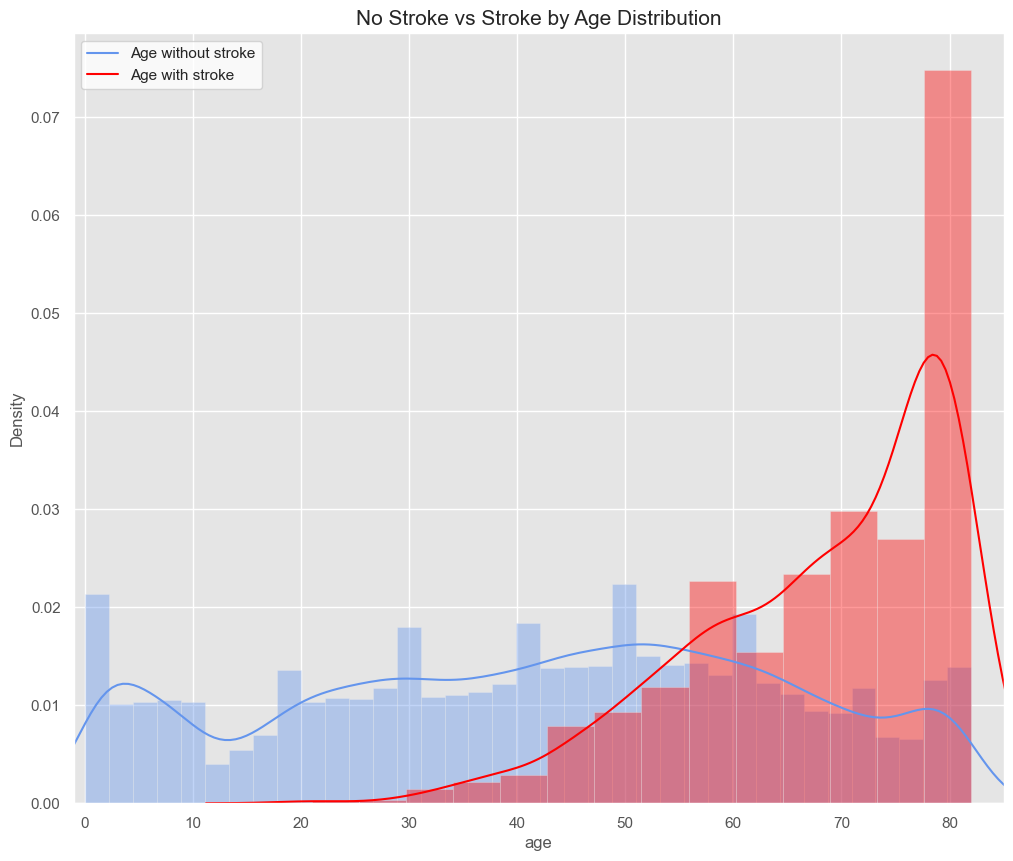

In [124]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["age"], color='cornflowerblue') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red
sns.set_theme(style="whitegrid")
plt.title('No Stroke vs Stroke by Age Distribution', fontsize=15)
plt.legend(labels=["Age without stroke","Age with stroke"])
plt.xlim([-1,85])
plt.show()

**Этот блок кода создает диаграмму рассеяния (scatter plot), которая визуализирует взаимосвязь между возрастом (age) и индексом массы тела (BMI) для пациентов, разделенных по полу.(мужчины -0, женщины - 1)**

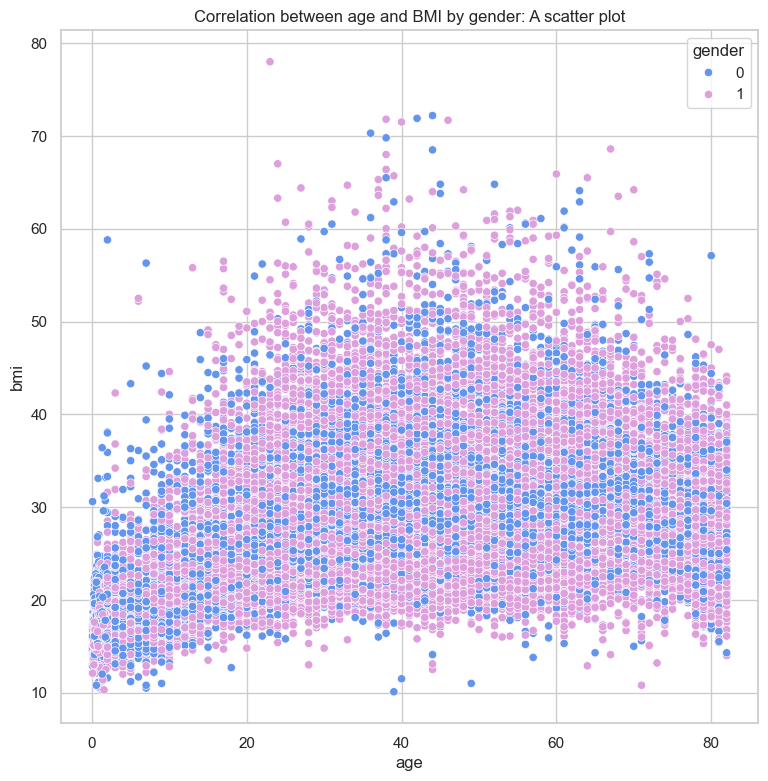

In [125]:
fig = plt.figure(figsize=(9,9))

graph = sns.scatterplot(data=data, x="age", y="bmi", hue='gender', palette=['cornflowerblue','plum'], legend='full')
plt.title("Correlation between age and BMI by gender: A scatter plot")
plt.show()

***Этот блок кода создает функцию stroke_by_age, которая подсчитывает количество случаев инсультов и отсутствия инсультов в зависимости от возрастных групп пациентов. Каждая возрастная группа определяется диапазоном возрастов (например, от 0 до 10 лет, от 11 до 20 лет и т.д.)**

Для пациентов с инсультом (data_stroke) и без инсульта (data_non_stroke) подсчитывается количество пациентов в каждой возрастной группе. Затем эти данные организуются в DataFrame df, где каждая строка соответствует определенной возрастной группе, а столбцы содержат количество случаев инсульта и его отсутствия для каждой группы.

После этого функция возвращает этот DataFrame df, а затем используется библиотека plotly.express (px) для создания столбчатой диаграммы (bar chart). Диаграмма отображает количество случаев инсульта и его отсутствия в каждой возрастной группе, позволяя визуально сравнить их распредел***ние.

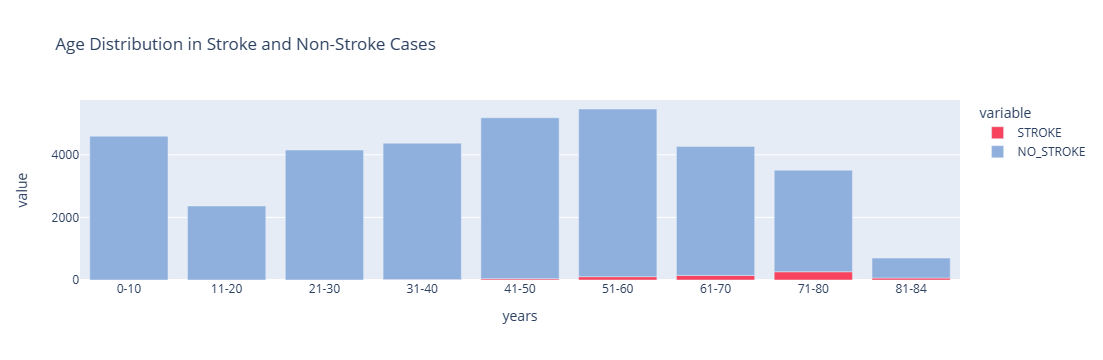

In [126]:
def stroke_by_age(data_stroke, data_non_stroke):
    under_10_st = data_stroke.loc[data_stroke.age < 11].count()[0]
    between_11_and_20_st = data_stroke.loc[(data_stroke.age >= 11) & (data_stroke.age < 21)].count()[0]
    between_21_and_30_st = data_stroke.loc[(data_stroke.age >= 21) & (data_stroke.age < 31)].count()[0]
    between_31_and_40_st = data_stroke.loc[(data_stroke.age >= 31) & (data_stroke.age < 41)].count()[0]
    between_41_and_50_st = data_stroke.loc[(data_stroke.age >= 41) & (data_stroke.age < 51)].count()[0]
    between_51_and_60_st = data_stroke.loc[(data_stroke.age >= 51) & (data_stroke.age < 61)].count()[0]
    between_61_and_70_st = data_stroke.loc[(data_stroke.age >= 61) & (data_stroke.age < 71)].count()[0]
    between_71_and_80_st = data_stroke.loc[(data_stroke.age >= 71) & (data_stroke.age < 81)].count()[0]
    between_81_and_90_st = data_stroke.loc[(data_stroke.age >= 81) & (data_stroke.age < 85)].count()[0]
    under_10_n = data_non_stroke.loc[data_non_stroke.age < 11].count()[0]
    between_11_and_20_n = data_non_stroke.loc[(data_non_stroke.age >= 11) & (data_non_stroke.age < 21)].count()[0]
    between_21_and_30_n = data_non_stroke.loc[(data_non_stroke.age >= 21) & (data_non_stroke.age < 31)].count()[0]
    between_31_and_40_n = data_non_stroke.loc[(data_non_stroke.age >= 31) & (data_non_stroke.age < 41)].count()[0]
    between_41_and_50_n = data_non_stroke.loc[(data_non_stroke.age >= 41) & (data_non_stroke.age < 51)].count()[0]
    between_51_and_60_n = data_non_stroke.loc[(data_non_stroke.age >= 51) & (data_non_stroke.age < 61)].count()[0]
    between_61_and_70_n = data_non_stroke.loc[(data_non_stroke.age >= 61) & (data_non_stroke.age < 71)].count()[0]
    between_71_and_80_n = data_non_stroke.loc[(data_non_stroke.age >= 71) & (data_non_stroke.age < 81)].count()[0]
    between_81_and_90_n = data_non_stroke.loc[(data_non_stroke.age >= 81) & (data_non_stroke.age < 85)].count()[0]

    df = pd.DataFrame({'years': ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-84'],
                       'STROKE': [under_10_st, between_11_and_20_st, between_21_and_30_st, between_31_and_40_st, between_41_and_50_st, 
                             between_51_and_60_st, between_61_and_70_st, between_71_and_80_st, between_81_and_90_st],
                  'NO_STROKE': [under_10_n, between_11_and_20_n, between_21_and_30_n, between_31_and_40_n, between_41_and_50_n,
                               between_51_and_60_n, between_61_and_70_n, between_71_and_80_n, between_81_and_90_n]})
    return df
df = stroke_by_age(data_stroke, data_non_stroke)
fig = px.bar(df, x="years", y=["STROKE", "NO_STROKE"], title="Age Distribution in Stroke and Non-Stroke Cases", color_discrete_sequence=['#F7435E', '#8FB0DD'])
fig.show()

***Этот блок кода строит график, который показывает изменение риска инсульта в зависимости от возраста.
Строится линейный график (линия риска инсульта по возрасту) с использованием библиотеки Seaborn***.

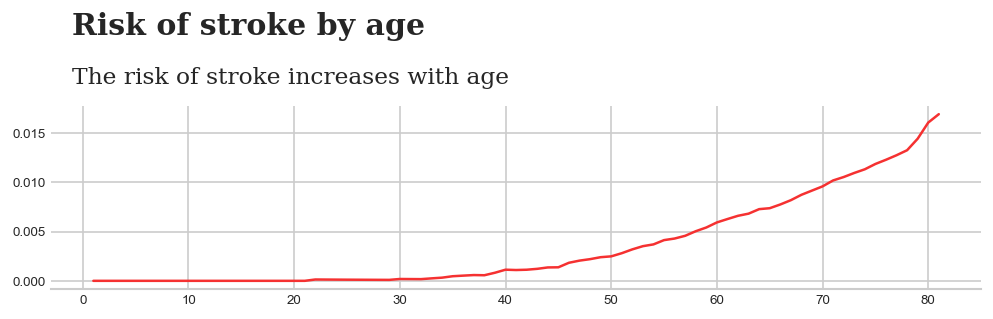

In [127]:
fig = plt.figure(figsize=(10, 10), dpi=120)
gs = fig.add_gridspec(5, 1)
gs.update(wspace=0.02, hspace=0.01)
ax0 = fig.add_subplot(gs[0, 0])
# ax0.set_facecolor()
data['age'] = data['age'].astype(int)
rate = []
for i in range(data['age'].min(), data['age'].max()):
    rate.append(data[data['age'] < i]['stroke'].sum() / len(data[data['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#f53131',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-1,0.025,'Risk of stroke by age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-1,0.020,'The risk of stroke increases with age',fontsize=14,fontfamily='serif')


plt.show()

## AVG Glucose Level

***Этот блок кода строит два графика рассеяния (scatter plot) для визуализации взаимосвязи между различными параметрами данных и инсультами.
Показывает взаимосвязь между возрастом или индексом массы тела с уровнем среднего уровня глюкозы в зависимости от наличия или отсутствия инсульта***.

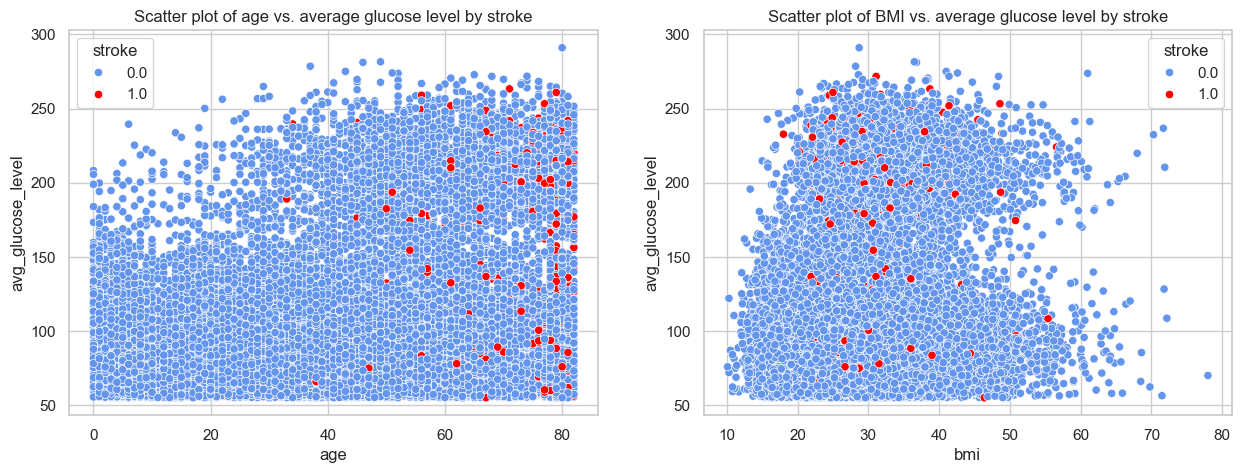

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.set_style("whitegrid")
sns.scatterplot(data = data, x = 'age', y = 'avg_glucose_level', hue='stroke', ax=axes[0],  palette=['cornflowerblue','red'])
tsns.scatterplot(data = data, x = 'bmi', y = 'avg_glucose_level', hue='stroke', ax=axes[1],   palette=['cornflowerblue','red'])
axes[0].set_title('Scatter plo of age vs. average glucose level by stroke')
axes[1].set_title('Scatter plot of BMI vs. average glucose level by stroke')
plt.show()

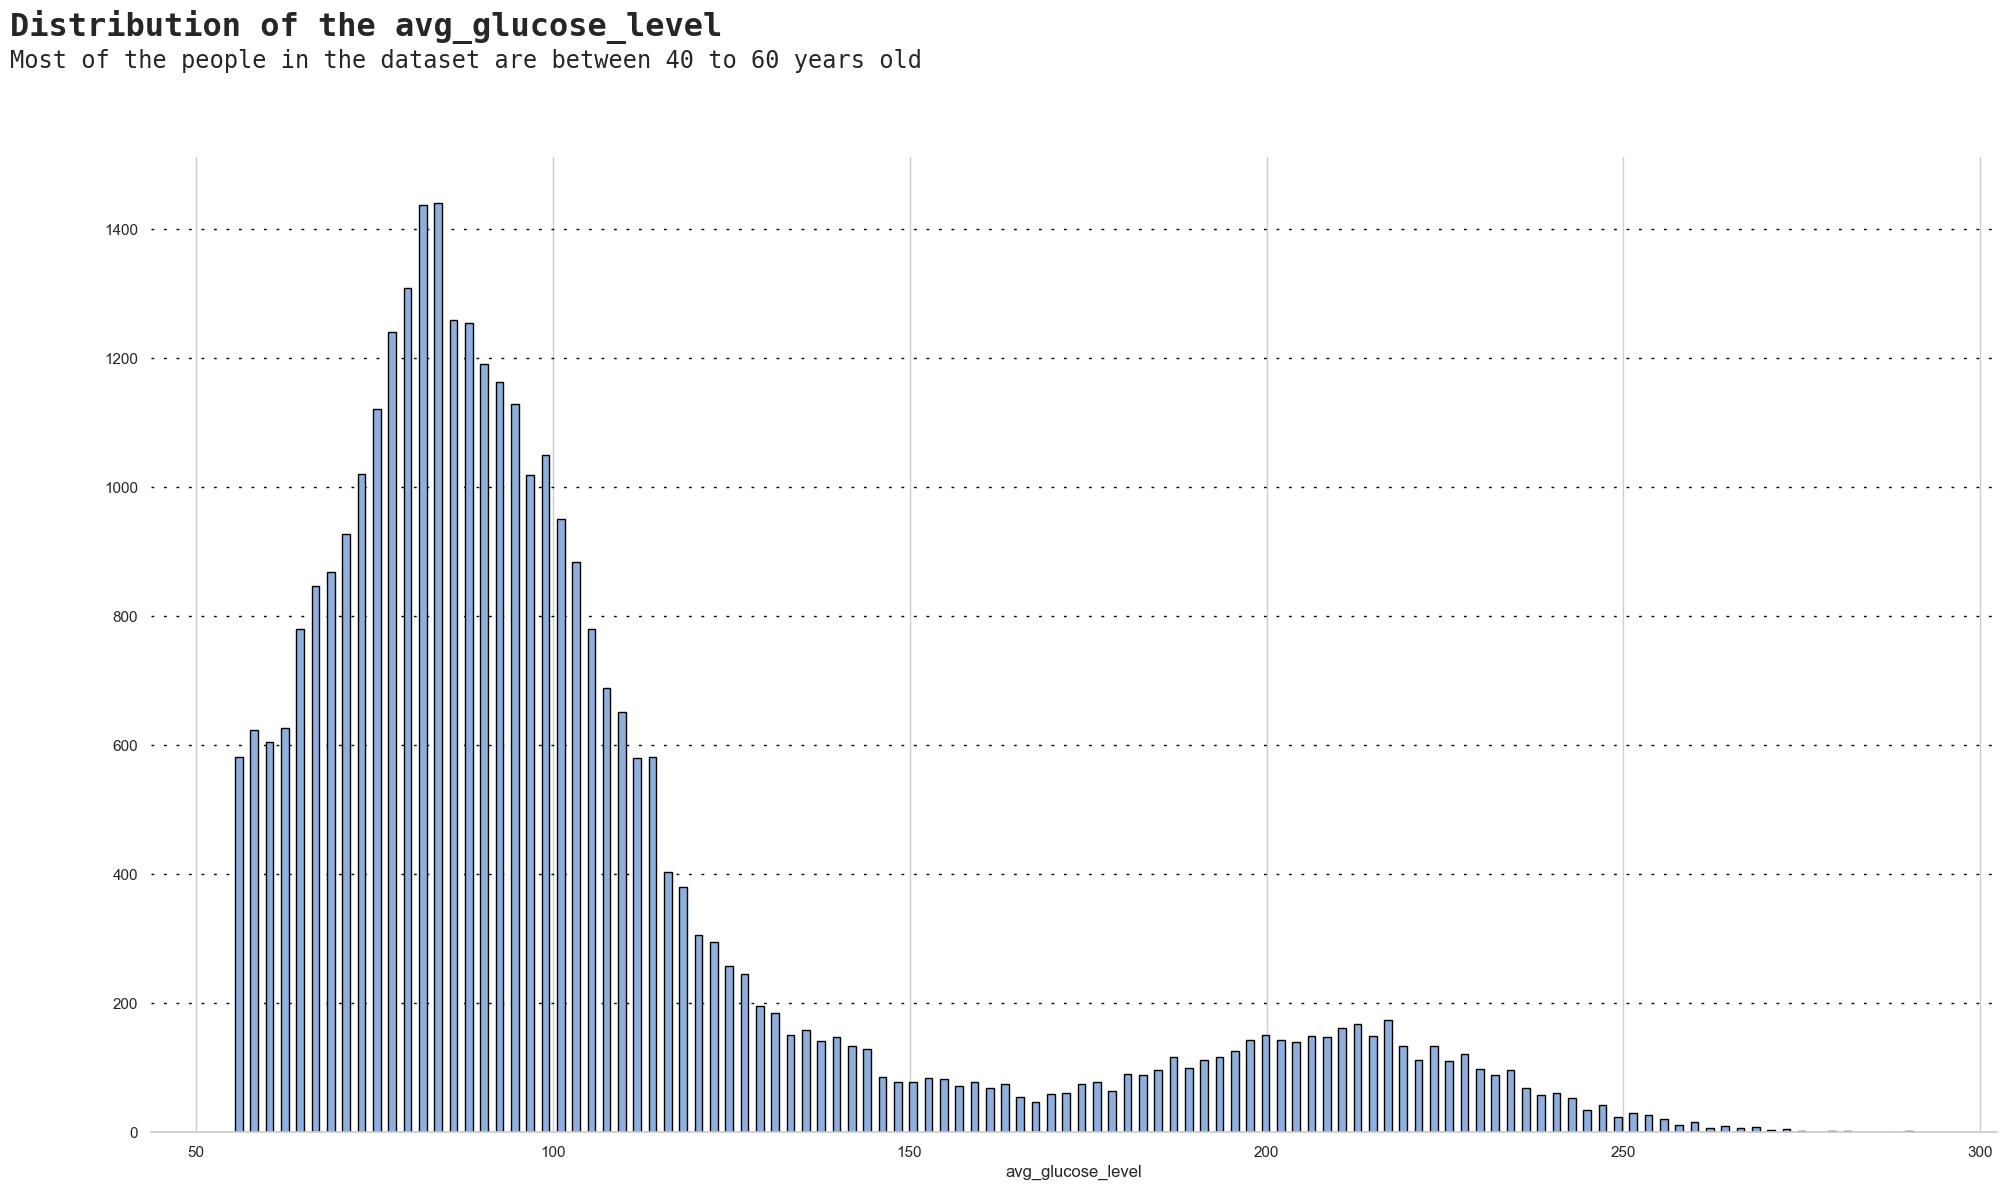

In [129]:
fig=plt.figure(figsize=(20,12),facecolor='white')
gs=fig.add_gridspec(1,1)
ax=[None for i in range(2)]
ax[0]=fig.add_subplot(gs[0,0])

ax[0].text(24,1700,'Distribution of the avg_glucose_level',fontsize=23,fontweight='bold', fontfamily='monospace')
ax[0].text(24,1650,'Most of the people in the dataset are between 40 to 60 years old',fontsize=17,fontweight='light', fontfamily='monospace')


sns.histplot(x=data['avg_glucose_level'],ax=ax[1], color='#8FB0DD', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)


for i in range(1):
    ax[0].set_ylabel('')
    ax[0].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[0].spines[direction].set_visible(False)
        
# ax[1].set_xlim(10,70)
        
plt.tight_layout()

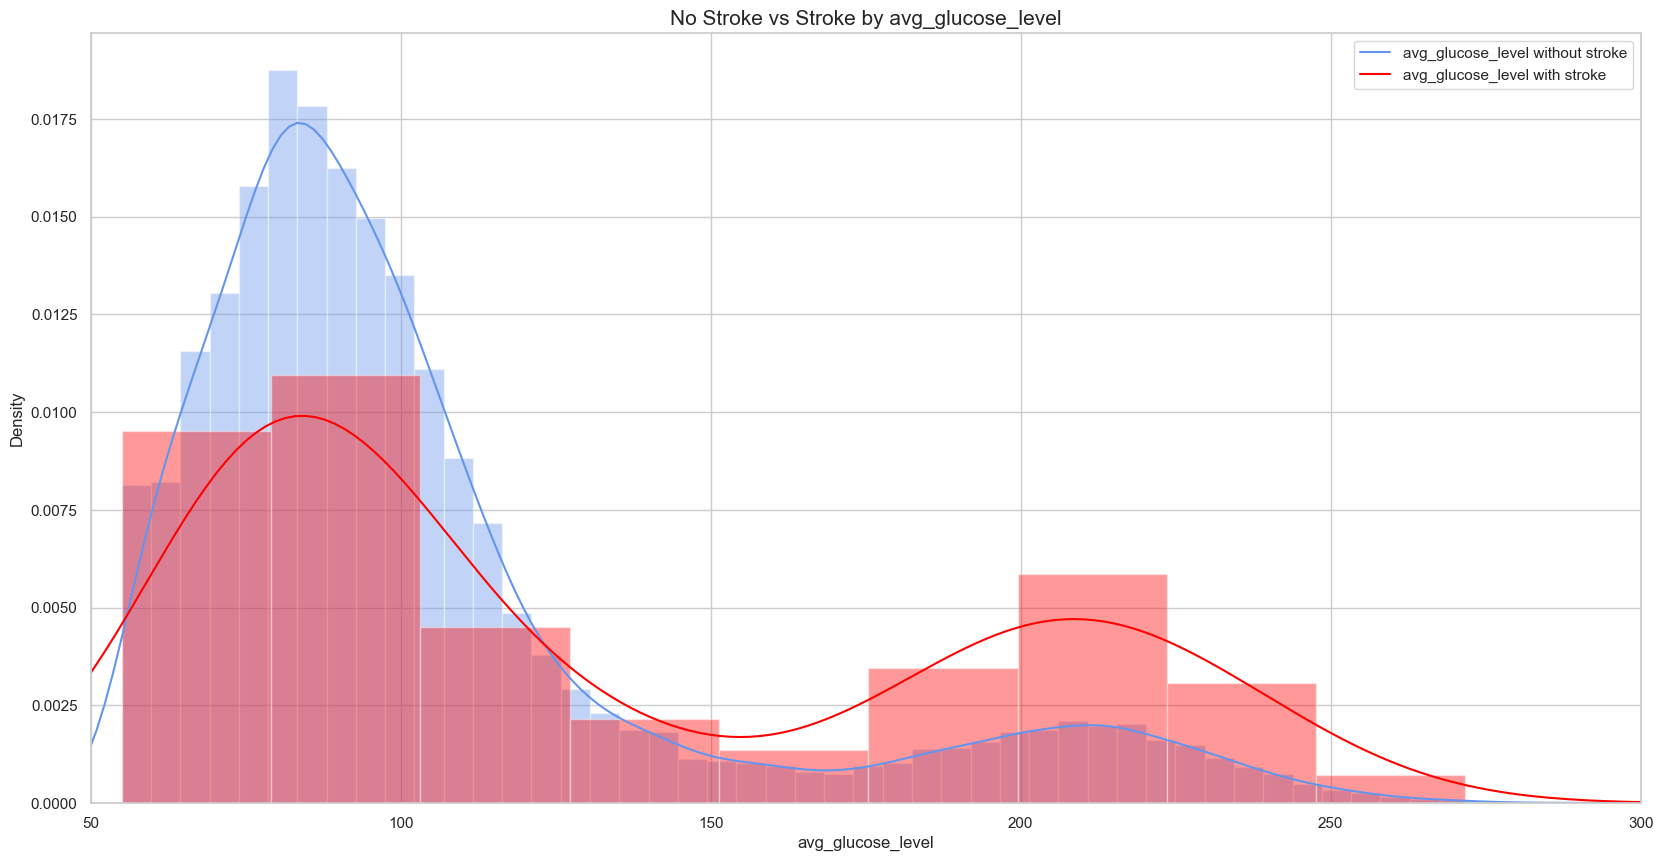

In [130]:
plt.figure(figsize=(20,10))

sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='cornflowerblue') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red
sns.set_theme(style="whitegrid")
plt.title('No Stroke vs Stroke by avg_glucose_level', fontsize=15)
plt.legend(labels=["avg_glucose_level without stroke","avg_glucose_level with stroke"])
plt.xlim([50,300])
plt.show()

## BMI

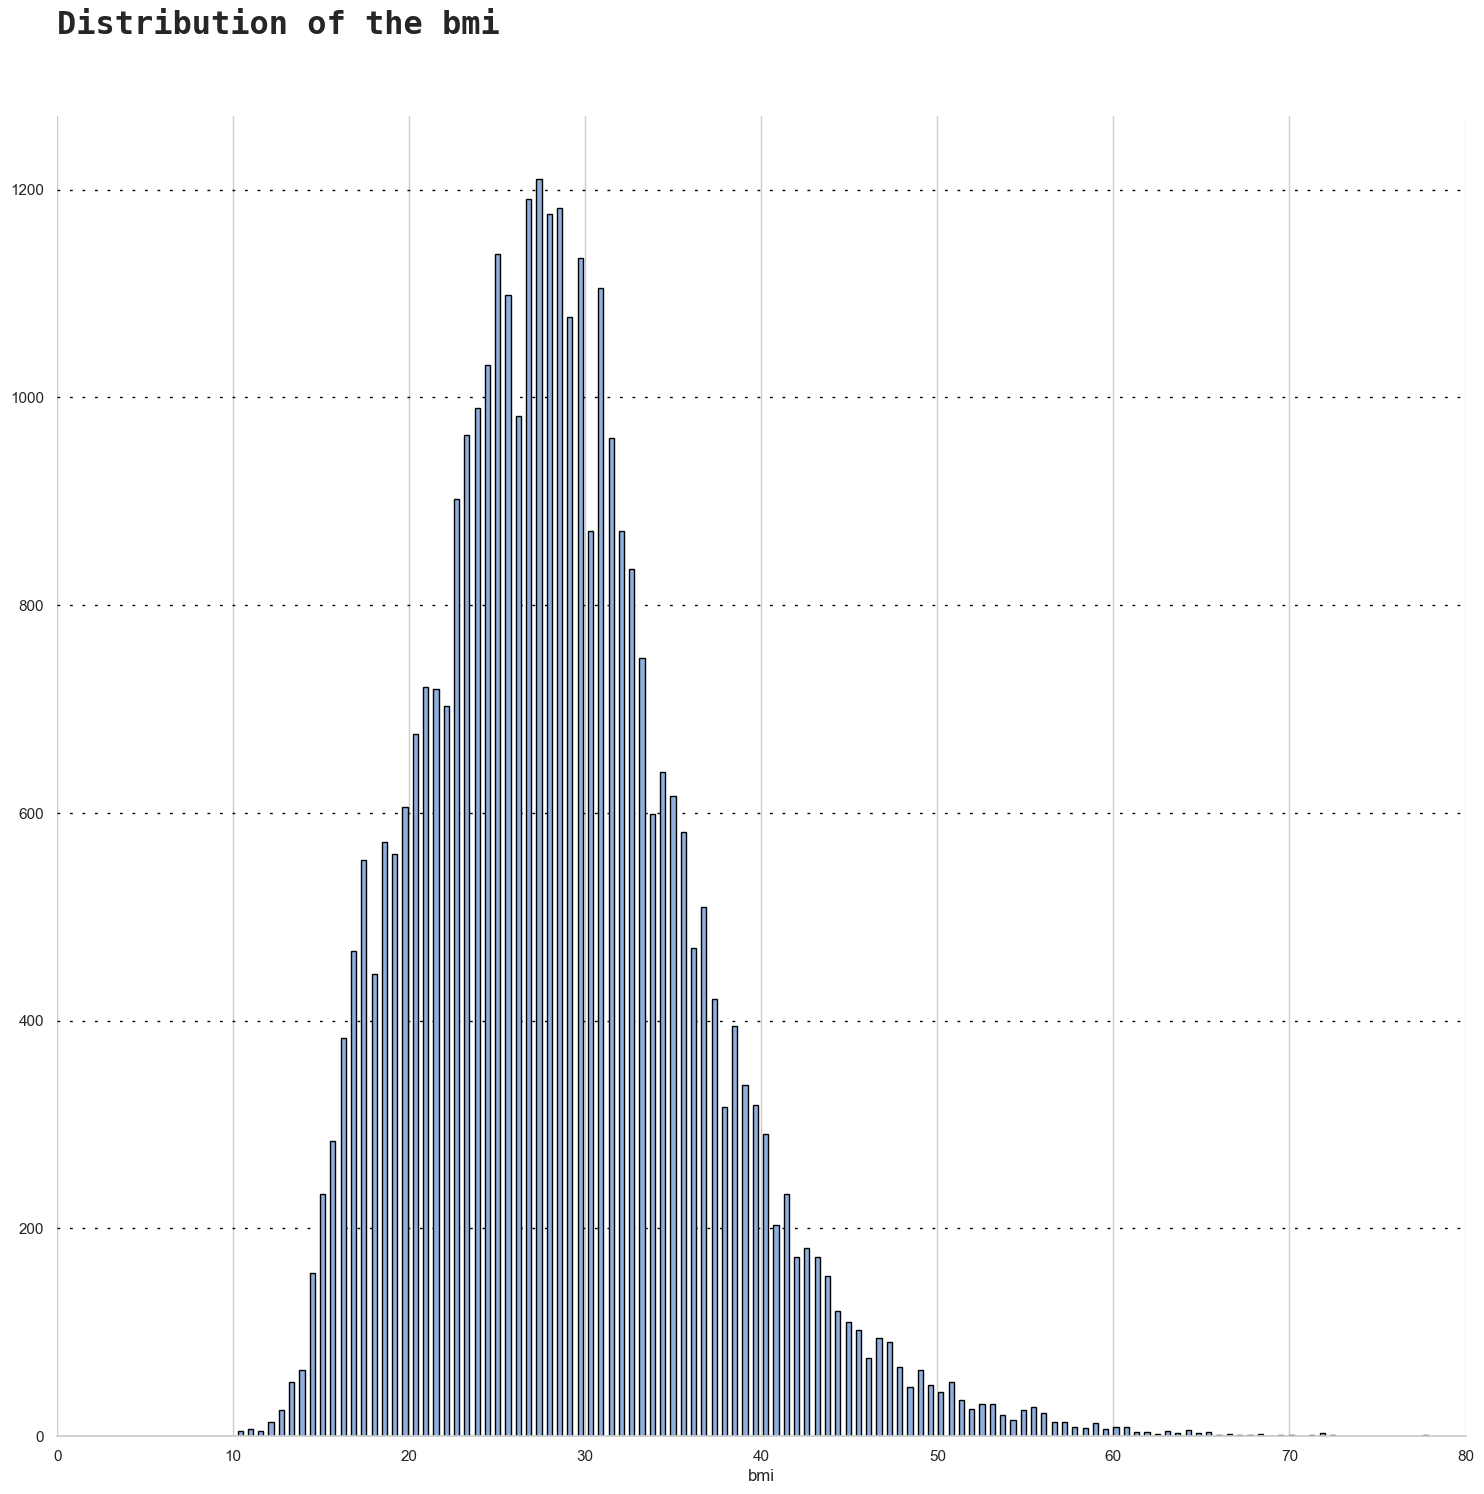

In [131]:
fig=plt.figure(figsize=(15,15),facecolor='white')
gs=fig.add_gridspec(1,1)
ax=[None for i in range(2)]
ax[0]=fig.add_subplot(gs[0,0])

ax[0].text(0,1350,'Distribution of the bmi',fontsize=23,fontweight='bold', fontfamily='monospace')
# ax[0].text(0,1300,'Most of the people in the dataset are between 40 to 60 years old',fontsize=17,fontweight='light', fontfamily='monospace')


sns.histplot(x=data['bmi'],ax=ax[1], color='#8FB0DD', alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)


for i in range(1):
    ax[0].set_ylabel('')
    ax[0].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[0].spines[direction].set_visible(False)
        

plt.xlim([0,80])        
plt.tight_layout()

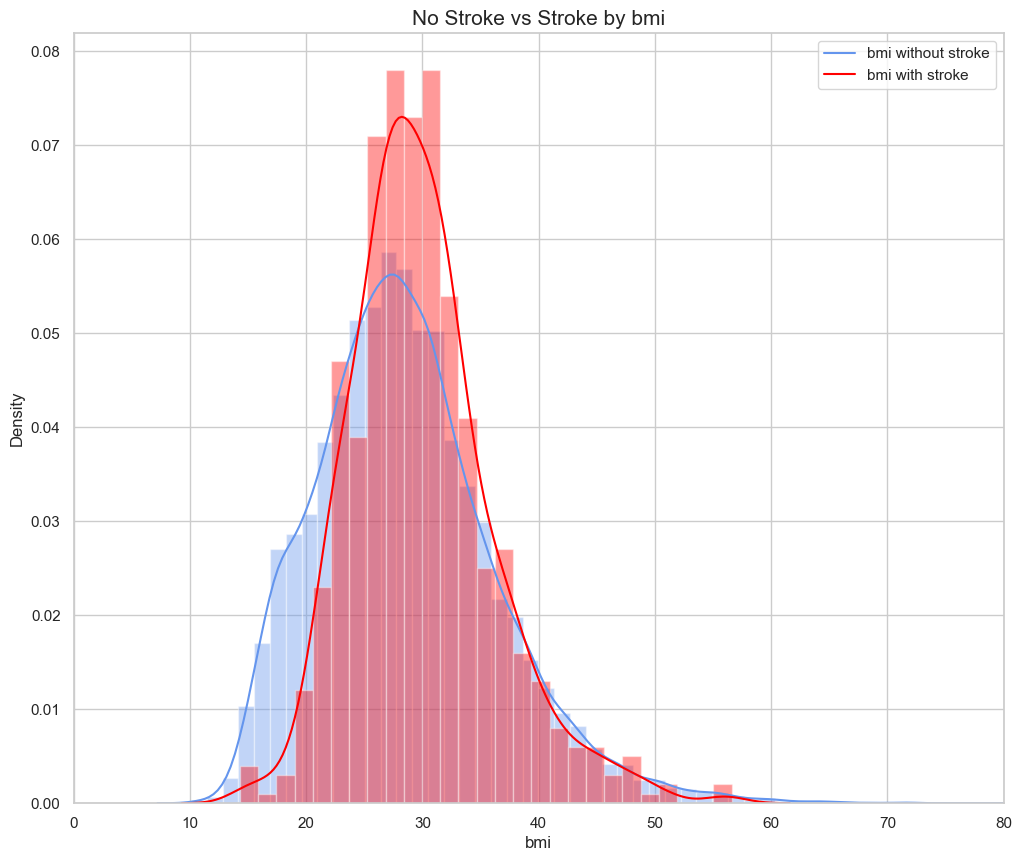

In [132]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["bmi"], color='cornflowerblue') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red') # Stroke - Red
sns.set_theme(style="whitegrid")
plt.title('No Stroke vs Stroke by bmi', fontsize=15)
plt.legend(labels=["bmi without stroke","bmi with stroke"])
plt.xlim([0,80])
plt.show()

## Stroke

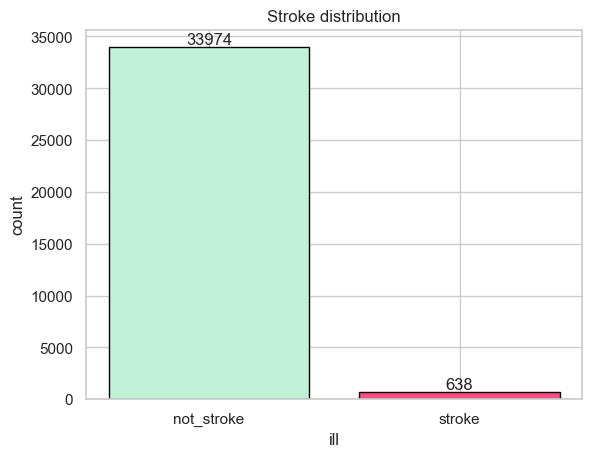

In [133]:
not_stroke = len(data[data['stroke'] == 0])
stroke = len(data[data['stroke'] == 1])
    # lists creation
y_picture = [not_stroke, stroke]
x_picture = ['not_stroke', 'stroke']
f = ['#bff2d9', '#fc4c84']
fig = plt.figure()
plt.bar(x_picture, y_picture, label="stroke", color=f, ec='black')  # plotting the graph
plt.xlabel("ill")  # create a label for x-axis
plt.ylabel("count")  # create a label for y-axis
plt.title("Stroke distribution")  # create a title for  graph
    #displaying a digital value above the bar charts
for i in range(len(x_picture)):
    plt.text(i, y_picture[i], y_picture[i], ha="center", va="bottom")
plt.show()

**OneHotEncoding for smoking status and work type**

Параметр **inplace=True** заставляет Pandas менять текущий датафрейм, а не создавать новый. data.rename (columns= {'name': 'Name'}, inplace= True) Переименование колонки.

In [134]:
data = pd.concat([data, pd.get_dummies(data['smoking_status'])], axis=1)
data.drop(['smoking_status'], axis=1, inplace=True)
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work')], axis=1)
data.drop(['work_type'], axis=1, inplace=True)
data = data.astype(int)
data

gender  age  hypertension  heart_disease  ever_married  Residence_type  \
0           0    3             0              0             0               0   
1           0   58             1              0             1               1   
2           1    8             0              0             1               1   
3           1   70             0              0             0               0   
6           1   52             0              0             1               1   
...       ...  ...           ...            ...           ...             ...   
43395       1   10             0              0             1               1   
43396       1   56             0              0             1               1   
43397       1   82             1              0             1               1   
43398       0   40             0              0             1               1   
43399       1   82             0              0             1               1   

       avg_glucose_level  bmi  stroke  formerly smoked  never smoked  smokes  \
0                     95   18       0                0             1       0   
1                     87   39       0                0             1       0   
2                    110   17       0                0             1       0   
3                     69   35       0                1             0       0   
6                     77   17       0                1             0       0   
...                  ...  ...     ...              ...           ...     ...   
43395                 58   20       0                0             1       0   
43396                213   55       0                1             0       0   
43397                 91   28       0                1             0       0   
43398                 99   33       0                0             1       0   
43399                 79   20       0                0             1       0   

       work_Govt_job  work_Never_worked  work_Private  work_Self-employed  \
0                  0                  0             0                   0   
1                  0                  0             1                   0   
2                  0                  0             1                   0   
3                  0                  0             1                   0   
6                  0                  0             1                   0   
...              ...                ...           ...                 ...   
43395              0                  0             0                   0   
43396              1                  0             0                   0   
43397              0                  0             1                   0   
43398              0                  0             1                   0   
43399              0                  0             1                   0   

       work_children  
0                  1  
1                  0  
2                  0  
3                  0  
6                  0  
...              ...  
43395              1  
43396              0  
43397              0  
43398              0  
43399              0  

[34612 rows x 17 columns]

In [135]:
data.to_csv('second.csv', index=False)

**Корреляция**

Корреляция играет важную роль в машинном обучении по нескольким причинам:


Оценка важности признаков: Корреляция может помочь определить, какие признаки в наборе данных сильно взаимосвязаны между собой. Если два признака сильно коррелируют, это может свидетельствовать о лишней информации, и один из этих признаков может быть удален без потери значимост

Выбор признаков: Анализ корреляции может помочь в выборе наиболее важных признаков для включения в модель. Признаки, сильно коррелированные с целевой переменной, могут быть более информативными.и.

data.corr(), Pandas вычисляет матрицу корреляций между всеми числовыми характеристиками (столбцами) в DataFrame data. 

In [136]:
data_corr = data.loc[:, ['age', 'avg_glucose_level', 'bmi']].corr()
data_corr

age  avg_glucose_level       bmi
age                1.000000           0.244713  0.386634
avg_glucose_level  0.244713           1.000000  0.208097
bmi                0.386634           0.208097  1.000000

**Значения** показывают степень линейной зависимости (корреляцию) между парами признаков. Значение корреляции находится между -1 и 1:

Чем ближе значение к 1, тем сильнее положительная линейная зависимость между признаками. Например, высокие значения возраста (age) и индекса массы тела (bmi) имеют положительную корреляцию 0.387, что говорит о том, что с возрастом обычно растет и индекс массы тела.

Чем ближе значение к -1, тем сильнее отрицательная линейная зависимость между признаками. Значения корреляции в пределах -1 указывают на обратную связь: когда один признак увеличивается, другой уменьшается.

Значения близкие к 0 говорят о слабой линейной зависимости между признаками.

**Дисперсия**

**Дисперсия (variance)** представляет собой меру разброса или разнообразия значений в наборе данных.

Чем больше дисперсия, тем больше разброс данных относительно их среднего значения.

In [137]:
data.var()

gender                   0.241190
age                    522.183283
hypertension             0.091497
heart_disease            0.046210
ever_married             0.250000
Residence_type           0.250000
avg_glucose_level     1935.109334
bmi                     59.899705
stroke                   0.018094
formerly smoked          0.169280
never smoked             0.241059
smokes                   0.153613
work_Govt_job            0.109779
work_Never_worked        0.002910
work_Private             0.245706
work_Self-employed       0.132591
work_children            0.126535
dtype: float64

In [139]:
#data